In [ ]:

!pip install -r requirements.txt  # Install dependencies (if there's a requirements file)


  Using cached absl_py-0.11.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached argon2_cffi-20.1.0-cp35-abi3-manylinux1_x86_64.whl.metadata (7.9 kB)
  Using cached async_generator-1.10-py3-none-any.whl.metadata (4.9 kB)
  Using cached attrs-20.3.0-py2.py3-none-any.whl.metadata (10 kB)
  Using cached bleach-3.2.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached cachetools-4.1.1-py3-none-any.whl.metadata (4.4 kB)
  Using cached certifi-2020.11.8-py2.py3-none-any.whl.metadata (3.0 kB)
  Using cached cffi-1.14.3.tar.gz (470 kB)
  Preparing metadata (setup.py) ... done
  Using cached chardet-3.0.4-py2.py3-none-any.whl.metadata (3.2 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl.metadata (722 bytes)
  Using cached defusedxml-0.6.0-py2.py3-none-any.whl.metadata (31 kB)
  Using cached eli5-0.10.1-py2.py3-none-any.whl.metadata (17 kB)
  Using cached entrypoints-0.3-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl.metadata (1.1 kB)
  Using cached g

In [ ]:
import numpy as np
import pandas as pd
import pprint
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, Birch, AgglomerativeClustering, DBSCAN, SpectralClustering
from yellowbrick.cluster import KElbowVisualizer, InterclusterDistance, SilhouetteVisualizer

In [ ]:
pp = pprint.PrettyPrinter(indent = 3)

In [ ]:
df = pd.read_csv("/content/kepler-data.csv")
print(df.shape)
df.head(10)

(9564, 50)


,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
5,6,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,7,10872983,K00756.02,Kepler-228 c,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
7,8,10872983,K00756.03,Kepler-228 b,CONFIRMED,CANDIDATE,0.992,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
8,9,6721123,K00114.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,-124.0,3.986,0.182,-0.098,1.958,0.322,-0.483,298.86435,42.151569,12.660
9,10,10910878,K00757.01,Kepler-229 c,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-83.0,4.485,0.083,-0.028,0.848,0.033,-0.072,286.99948,48.375790,15.841


Counting NaN Values

In [ ]:
nan_columns = df.isnull().sum()
nan_columns = {col:count for col, count in nan_columns.items() if count >0}

In [ ]:
pp.pprint(nan_columns)

{  'kepler_name': 7270,
   'koi_depth': 363,
   'koi_depth_err1': 454,
   'koi_depth_err2': 454,
   'koi_duration_err1': 454,
   'koi_duration_err2': 454,
   'koi_impact': 363,
   'koi_impact_err1': 454,
   'koi_impact_err2': 454,
   'koi_insol': 321,
   'koi_insol_err1': 321,
   'koi_insol_err2': 321,
   'koi_kepmag': 1,
   'koi_model_snr': 363,
   'koi_period_err1': 454,
   'koi_period_err2': 454,
   'koi_prad': 363,
   'koi_prad_err1': 363,
   'koi_prad_err2': 363,
   'koi_score': 1510,
   'koi_slogg': 363,
   'koi_slogg_err1': 468,
   'koi_slogg_err2': 468,
   'koi_srad': 363,
   'koi_srad_err1': 468,
   'koi_srad_err2': 468,
   'koi_steff': 363,
   'koi_steff_err1': 468,
   'koi_steff_err2': 483,
   'koi_tce_delivname': 346,
   'koi_tce_plnt_num': 346,
   'koi_teq': 363,
   'koi_teq_err1': 9564,
   'koi_teq_err2': 9564,
   'koi_time0bk_err1': 454,
   'koi_time0bk_err2': 454}


Preliminary Cleaning
Removing Mostly NaN Columns
We notice that all the values in 2 columns are NaN:

1. koi_teq_err1,
2. koi_teq_err2
These columns are the associated errors in estimating the equilibrium temperatures of a exoplanet, and are approximated quantities.
Since we cannot estimate their values, we can drop them.

In [ ]:
df.drop(columns = ["koi_teq_err1", "koi_teq_err2"], inplace = True)

Removing Mostly NaN Rows :-
A threshold is set such that rows in which atleast 20% of the fields are NaN are dropped.

In [ ]:
df = df[~(df.isnull().sum(axis=1) > int((0.2)*df.shape[1]))]

Shape after Preliminary Cleaning

In [ ]:
print(df.shape)

(9103, 48)


We observe that:

The number of rows has decreased from 9564 to 9110
The number of columns has descreased from 50 to 47

Replacing NaN Values

There are two broad types of NaN values present.

NaN in Error Values - These include the positive and negative error in estimating attributes
NaN in Measurable Attributes - These include missing values in measuring attributes


Replacing NaN in Error Values

Finding Error Attributes with NaN

In [ ]:
missing_error_attribute_names = [attr for attr in df.columns if "err" in attr]
pp.pprint(missing_error_attribute_names)

[  'koi_period_err1',
   'koi_period_err2',
   'koi_time0bk_err1',
   'koi_time0bk_err2',
   'koi_impact_err1',
   'koi_impact_err2',
   'koi_duration_err1',
   'koi_duration_err2',
   'koi_depth_err1',
   'koi_depth_err2',
   'koi_prad_err1',
   'koi_prad_err2',
   'koi_insol_err1',
   'koi_insol_err2',
   'koi_steff_err1',
   'koi_steff_err2',
   'koi_slogg_err1',
   'koi_slogg_err2',
   'koi_srad_err1',
   'koi_srad_err2']


Since these are positive and negative error measures for the corresponding attributes, we can do either of the following

1. Replace with the mean or median of the attribute errors
2. Drop the rows
3. Replace with a default value = 0
4. Take a look at the percentage error between the column and its associated error.

We cannot use regression based techniques to estimate the error since

1. A greater set of values does not mean a greater error
2. The errors consist of errors while estimating a value and do not depend on any of the attributes

Finding Distributions of Error Attributes

Let us first extract a slice of the dataset that contains the error attributes.

In [ ]:
missing_error_values_df = df[missing_error_attribute_names].copy()
print(missing_error_values_df.shape)
missing_error_values_df.head()

(9103, 20)


,koi_period_err1,koi_period_err2,koi_time0bk_err1,koi_time0bk_err2,koi_impact_err1,koi_impact_err2,koi_duration_err1,koi_duration_err2,koi_depth_err1,koi_depth_err2,koi_prad_err1,koi_prad_err2,koi_insol_err1,koi_insol_err2,koi_steff_err1,koi_steff_err2,koi_slogg_err1,koi_slogg_err2,koi_srad_err1,koi_srad_err2
0,2.775000e-05,-2.775000e-05,0.002160,-0.002160,0.318,-0.146,0.08190,-0.08190,19.5,-19.5,0.26,-0.15,29.45,-16.65,81.0,-81.0,0.064,-0.096,0.105,-0.061
1,2.479000e-04,-2.479000e-04,0.003520,-0.003520,0.059,-0.443,0.11600,-0.11600,35.5,-35.5,0.32,-0.19,2.87,-1.62,81.0,-81.0,0.064,-0.096,0.105,-0.061
2,1.494000e-05,-1.494000e-05,0.000581,-0.000581,5.126,-0.077,0.03410,-0.03410,171.0,-171.0,3.92,-1.31,31.04,-10.49,158.0,-176.0,0.044,-0.176,0.233,-0.078
3,2.630000e-07,-2.630000e-07,0.000115,-0.000115,0.115,-0.092,0.00537,-0.00537,12.8,-12.8,8.50,-2.83,668.95,-230.35,157.0,-174.0,0.053,-0.168,0.201,-0.067
4,3.761000e-06,-3.761000e-06,0.001130,-0.001130,0.235,-0.478,0.04200,-0.04200,16.9,-16.9,0.88,-0.35,874.33,-314.24,169.0,-211.0,0.070,-0.210,0.334,-0.133


We can now find the mean and median of the remaining columns.

In [ ]:
error_attribute_means = np.nanmean(missing_error_values_df.values, axis=0)
error_attribute_means

array([ 2.14785191e-03, -2.14785191e-03,  9.90408948e-03, -9.90408948e-03,
        1.96125020e+00, -3.32571405e-01,  3.39023090e-01, -3.39023090e-01,
        1.23215753e+02, -1.23215753e+02,  1.76901692e+01, -3.32224245e+01,
        3.48579057e+03, -3.77454723e+03,  1.44517597e+02, -1.62054604e+02,
        1.20314977e-01, -1.43213390e-01,  3.58282447e-01, -3.78140446e-01])

In [ ]:
error_attribute_medians = np.nanmedian(missing_error_values_df.values, axis=0)
error_attribute_medians

array([ 3.506e-05, -3.506e-05,  4.120e-03, -4.120e-03,  1.930e-01,
       -2.070e-01,  1.420e-01, -1.420e-01,  2.070e+01, -2.070e+01,
        5.200e-01, -3.000e-01,  7.192e+01, -3.966e+01,  1.570e+02,
       -1.600e+02,  7.000e-02, -1.280e-01,  2.500e-01, -1.110e-01])

There seems to be some difference in the median and mean values, suggesting skewed data for attributes.
We might need to plot each and decide when we can take the mean or the median.

Replacing NaN in Orbital Period

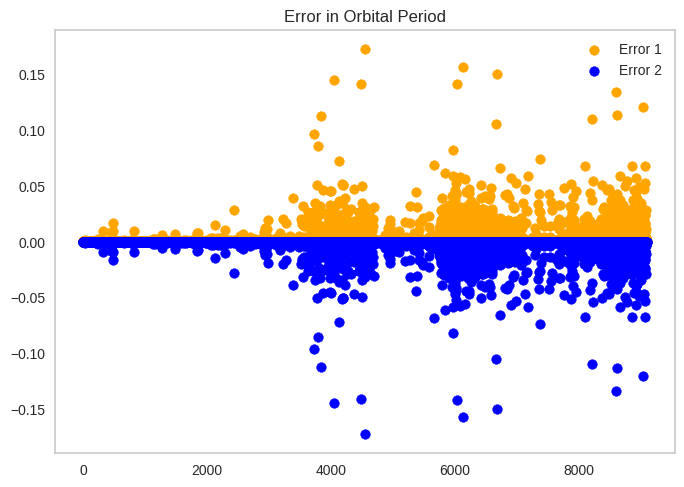

In [ ]:
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_period_err1"].values, label = "Error 1", color = "orange")
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_period_err2"].values, label = "Error 2", color = "blue")
plt.title("Error in Orbital Period")
plt.grid()
plt.legend()

Viewing Frequency Distribution

Positive Error

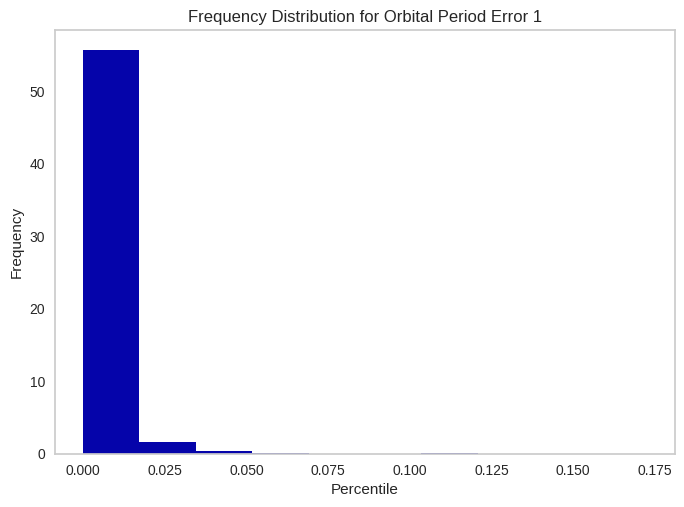

In [ ]:
plt.hist(missing_error_values_df["koi_period_err1"].values, color = "#0504aa", density=True)
plt.title("Frequency Distribution for Orbital Period Error 1")
plt.xlabel("Percentile")
plt.ylabel("Frequency")
plt.grid()

In [ ]:


df["koi_period_err1"] = df["koi_period_err1"].fillna(
    np.nanpercentile(missing_error_values_df["koi_period_err1"].values, 50)
)


Negative Error

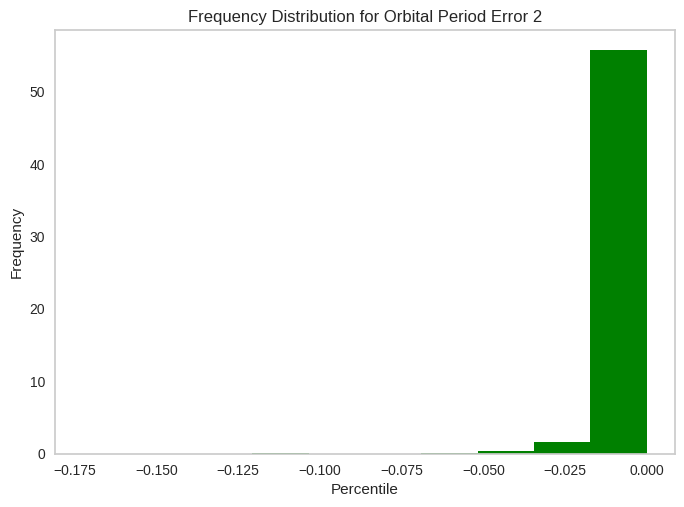

In [ ]:
plt.hist(missing_error_values_df["koi_period_err2"].values, color="green", density = True)
plt.title("Frequency Distribution for Orbital Period Error 2")
plt.xlabel("Percentile")
plt.ylabel("Frequency")
plt.grid()


In [ ]:


df["koi_period_err2"] = df["koi_period_err2"].fillna(
    np.nanpercentile(missing_error_values_df["koi_period_err2"].values, 50)
)


Replacing NaN in Transit Epoch

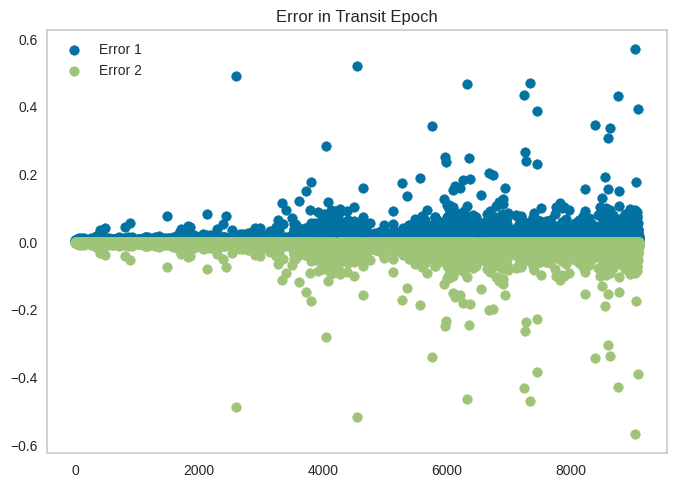

In [ ]:
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_time0bk_err1"].values, label = "Error 1", )
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_time0bk_err2"].values, label = "Error 2")
plt.title("Error in Transit Epoch")
plt.legend()
plt.grid()


Viewing Frequency Distribution

Positive Error

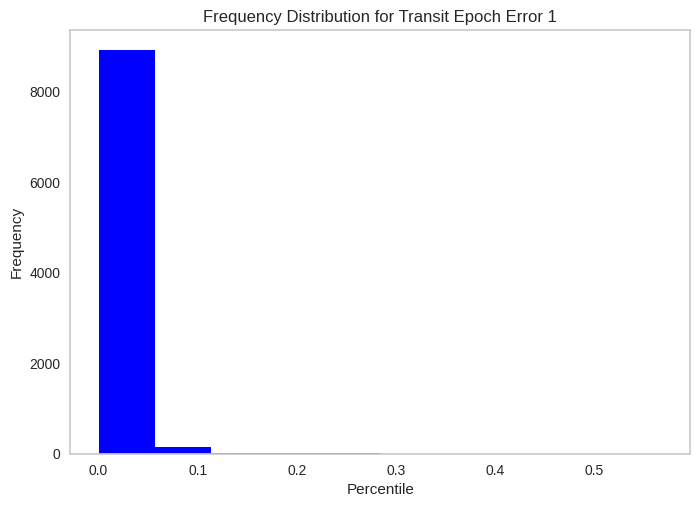

In [ ]:
plt.hist(missing_error_values_df["koi_time0bk_err1"].values, color="blue")
plt.title("Frequency Distribution for Transit Epoch Error 1")
plt.xlabel("Percentile")
plt.ylabel("Frequency")
plt.grid()

In [ ]:

df["koi_time0bk_err1"] = df["koi_time0bk_err1"].fillna(
    np.nanpercentile(missing_error_values_df["koi_time0bk_err1"].values, 50)
)


Negative Error

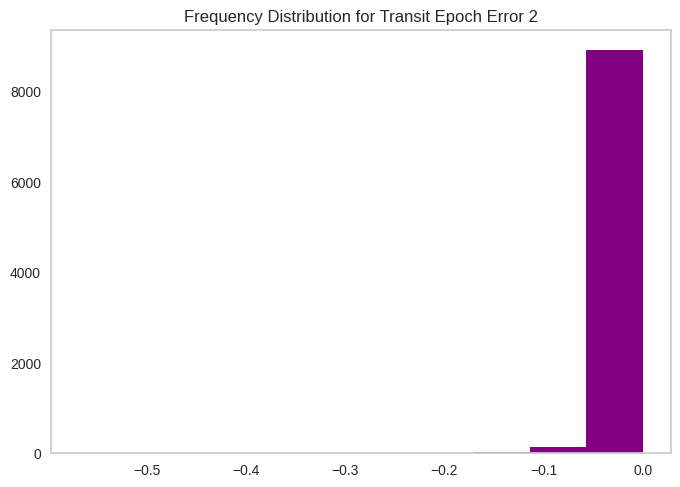

In [ ]:
plt.hist(missing_error_values_df["koi_time0bk_err2"].values, color="purple")
plt.title("Frequency Distribution for Transit Epoch Error 2")
plt.grid()

In [ ]:

df["koi_time0bk_err2"].fillna(np.nanpercentile(missing_error_values_df["koi_time0bk_err2"].values, 50), inplace = True)

In [ ]:

df["koi_time0bk_err2"] = df["koi_time0bk_err2"].fillna(
    np.nanpercentile(missing_error_values_df["koi_time0bk_err2"].values, 50)
)


Replacing NaN in Impact Parameter

Viewing Frequency Distribution

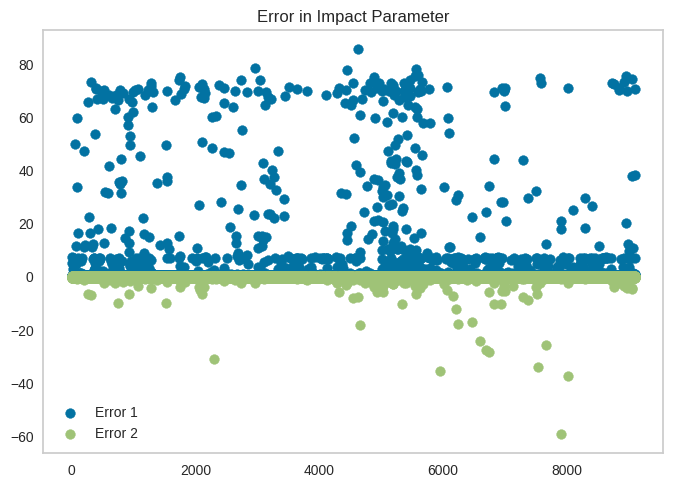

In [ ]:
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_impact_err1"].values, label = "Error 1")
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_impact_err2"].values, label = "Error 2")
plt.title("Error in Impact Parameter")
plt.legend()
plt.grid()

Positive Error

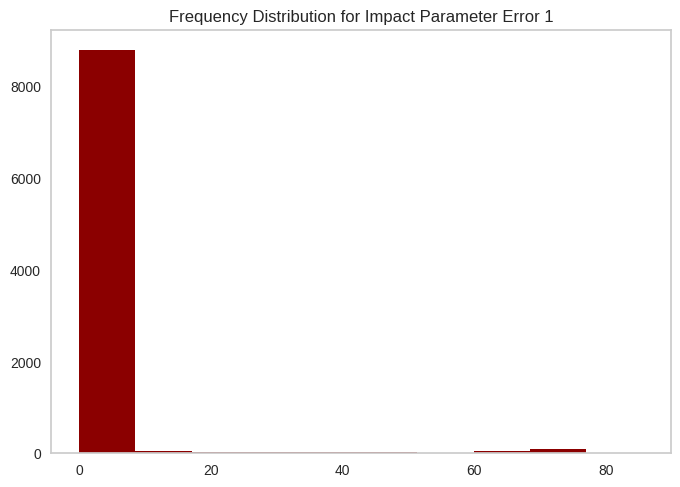

In [ ]:
plt.hist(missing_error_values_df["koi_impact_err1"].values, color="darkred")
plt.title("Frequency Distribution for Impact Parameter Error 1")
plt.grid()

In [ ]:
# original
df["koi_impact_err1"].fillna(np.nanpercentile(missing_error_values_df["koi_impact_err1"].values, 50), inplace = True)

In [ ]:

df["koi_impact_err1"] = df["koi_impact_err1"].fillna(
    np.nanpercentile(missing_error_values_df["koi_impact_err1"].values, 50)
)


Negative Error

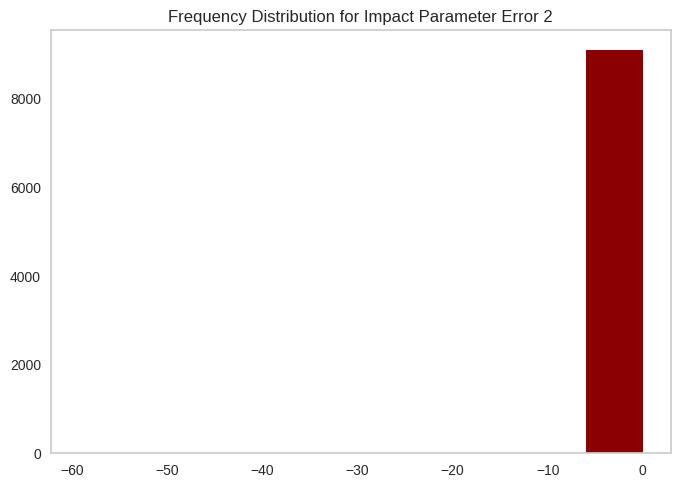

In [ ]:
plt.hist(missing_error_values_df["koi_impact_err2"].values, color="darkred")
plt.title("Frequency Distribution for Impact Parameter Error 2")
plt.grid()

In [ ]:

df["koi_impact_err2"].fillna(np.nanpercentile(missing_error_values_df["koi_impact_err2"].values, 50), inplace = True)

In [ ]:

df["koi_impact_err2"] = df["koi_impact_err2"].fillna(
    np.nanpercentile(missing_error_values_df["koi_impact_err2"].values, 50)
)


Replacing NaN in Transit Duration

Viewing Frequency Distribution

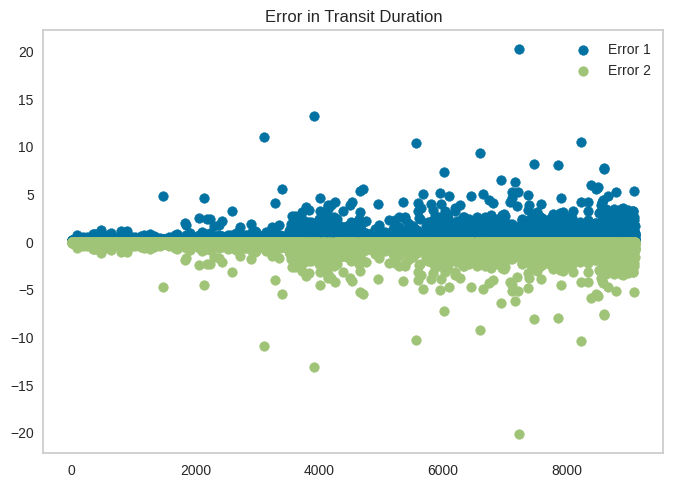

In [ ]:
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_duration_err1"].values, label = "Error 1")
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_duration_err2"].values, label = "Error 2")
plt.title("Error in Transit Duration")
plt.legend()
plt.grid()


POSITIVE ERROR

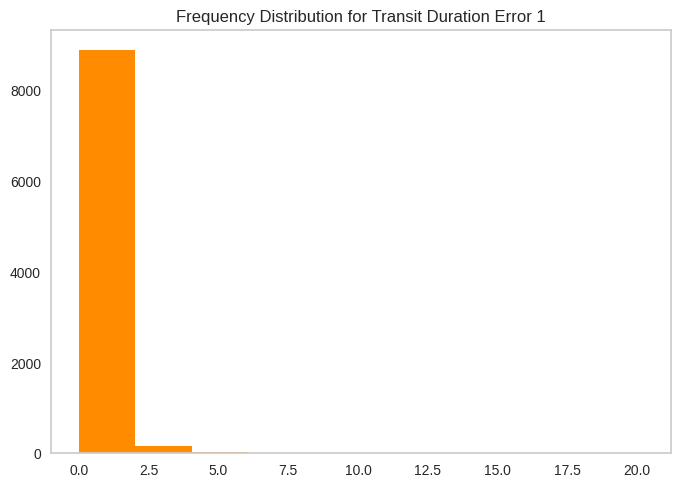

In [ ]:
plt.hist(missing_error_values_df["koi_duration_err1"].values, color="darkorange")
plt.title("Frequency Distribution for Transit Duration Error 1")
plt.grid()

In [ ]:

df["koi_duration_err1"].fillna(np.nanpercentile(missing_error_values_df["koi_duration_err1"].values, 50), inplace = True)

In [ ]:

df["koi_duration_err1"] = df["koi_duration_err1"].fillna(
    np.nanpercentile(missing_error_values_df["koi_duration_err1"].values, 50)
)


NEGATIVE ERROR

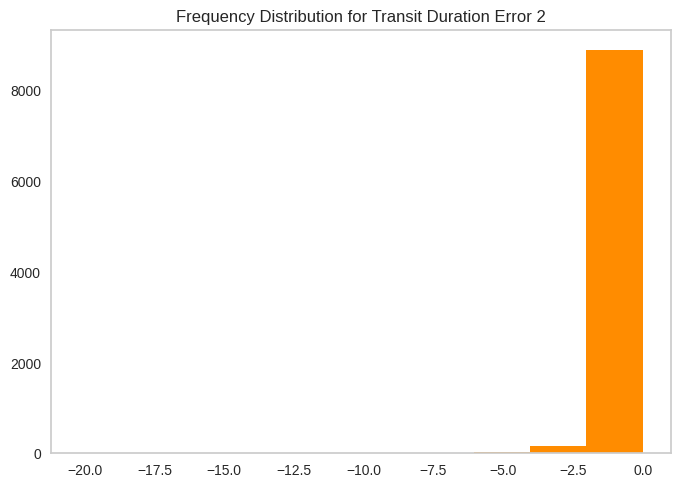

In [ ]:
plt.hist(missing_error_values_df["koi_duration_err2"].values, color="darkorange")
plt.title("Frequency Distribution for Transit Duration Error 2")
plt.grid()

In [ ]:

df["koi_duration_err2"].fillna(np.nanpercentile(missing_error_values_df["koi_duration_err2"].values, 50), inplace = True)

In [ ]:

df["koi_duration_err2"] = df["koi_duration_err2"].fillna(
    np.nanpercentile(missing_error_values_df["koi_duration_err2"].values, 50)
)


Replacing NaN in Transit Depth

Viewing Frequency Distribution

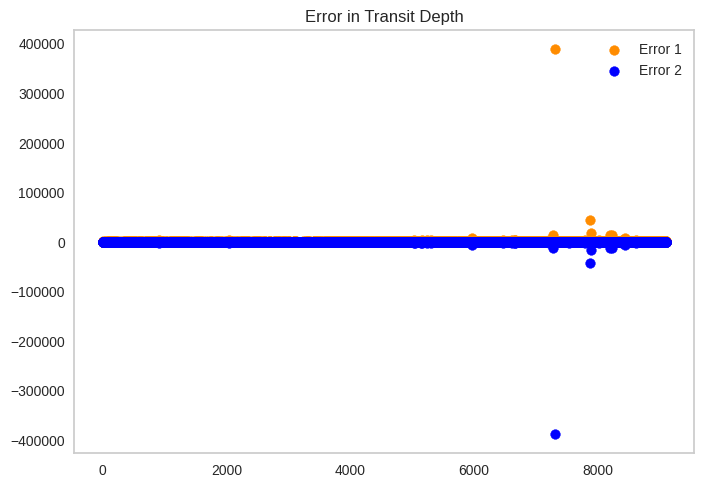

In [ ]:
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_depth_err1"].values, label = "Error 1", color="darkorange" )
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_depth_err2"].values, label = "Error 2", color="blue")
plt.title("Error in Transit Depth")
plt.legend()
plt.grid()

POSITIVE ERROR

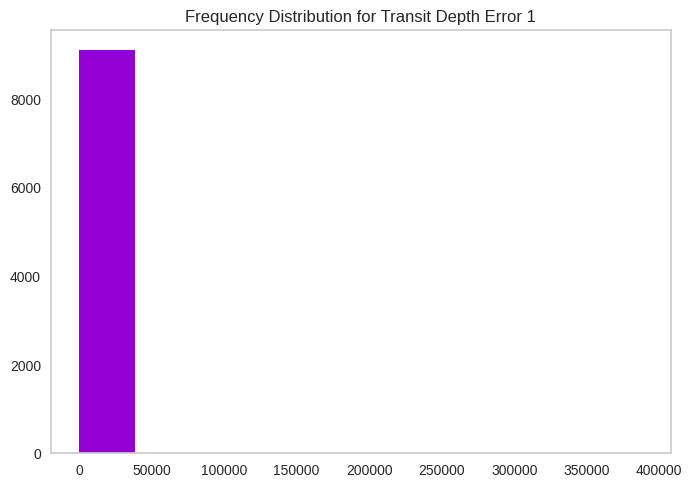

In [ ]:
plt.hist(missing_error_values_df["koi_depth_err1"].values, color="darkviolet")
plt.title("Frequency Distribution for Transit Depth Error 1")
plt.grid()

In [ ]:

df["koi_depth_err1"].fillna(np.nanpercentile(missing_error_values_df["koi_depth_err1"].values, 50), inplace = True)

In [ ]:

df["koi_depth_err1"] = df["koi_depth_err1"].fillna(
    np.nanmedian(missing_error_values_df["koi_depth_err1"].values)
)


Replacing NaN in Planet Radius

Viewing Frequency Distribution

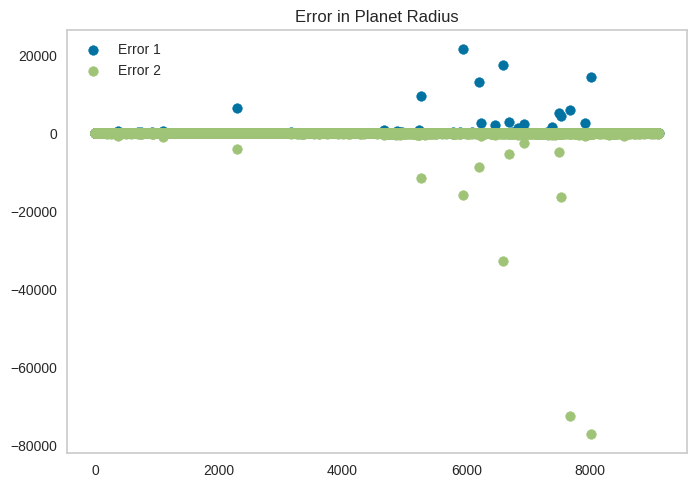

In [ ]:
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_prad_err1"].values, label = "Error 1")
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_prad_err2"].values, label = "Error 2")
plt.title("Error in Planet Radius")
plt.legend()
plt.grid()

POSITIVE ERROR

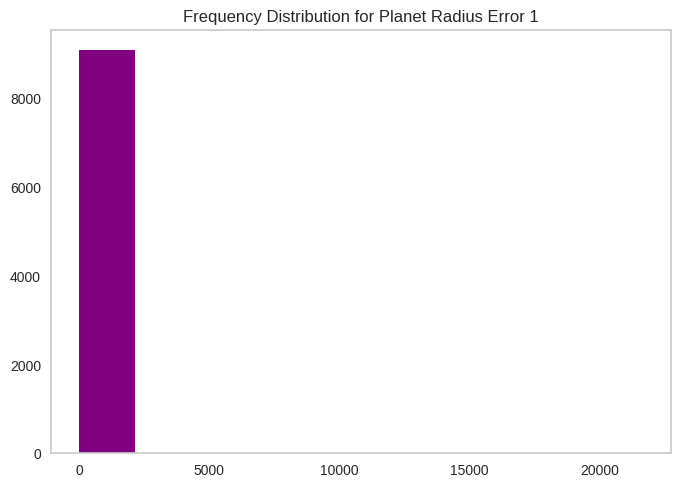

In [ ]:
plt.hist(missing_error_values_df["koi_prad_err1"].values, color="purple")
plt.title("Frequency Distribution for Planet Radius Error 1")
plt.grid()

In [ ]:
df["koi_prad_err1"].fillna(np.nanpercentile(missing_error_values_df["koi_prad_err1"].values, 50), inplace = True)

In [ ]:

df["koi_prad_err1"] = df["koi_prad_err1"].fillna(
    np.nanpercentile(missing_error_values_df["koi_prad_err1"].values, 50)
)


NEGATIVE ERROR

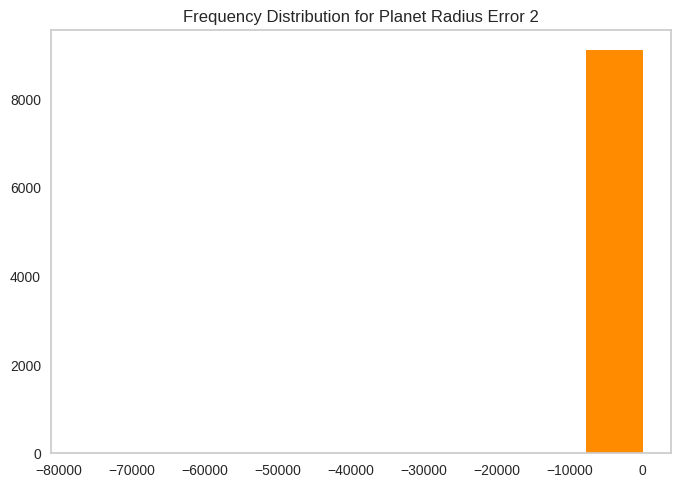

In [ ]:
plt.hist(missing_error_values_df["koi_prad_err2"].values, color="darkorange")
plt.title("Frequency Distribution for Planet Radius Error 2")
plt.grid()

In [ ]:
#
df["koi_prad_err2"].fillna(np.nanpercentile(missing_error_values_df["koi_prad_err2"].values, 50), inplace = True)

In [ ]:

df["koi_prad_err2"] = df["koi_prad_err2"].fillna(
    np.nanpercentile(missing_error_values_df["koi_prad_err2"].values, 50)
)


Replacing NaN in Insolation Flux

Viewing Frequency Distribution

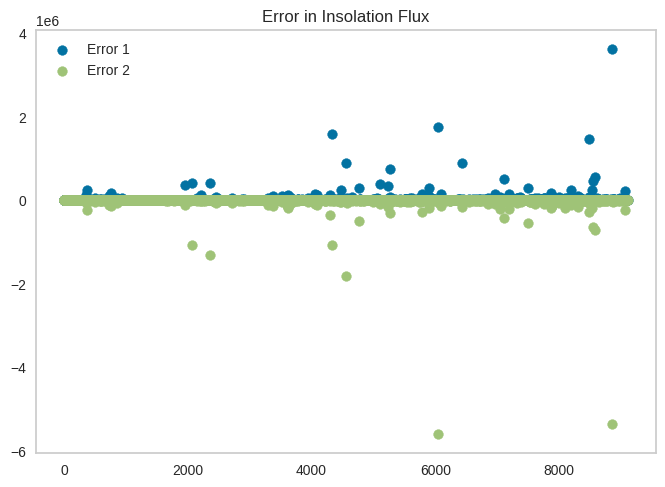

In [ ]:
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_insol_err1"].values, label = "Error 1")
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_insol_err2"].values, label = "Error 2")
plt.title("Error in Insolation Flux")
plt.legend()
plt.grid()

POSITIVE ERROR

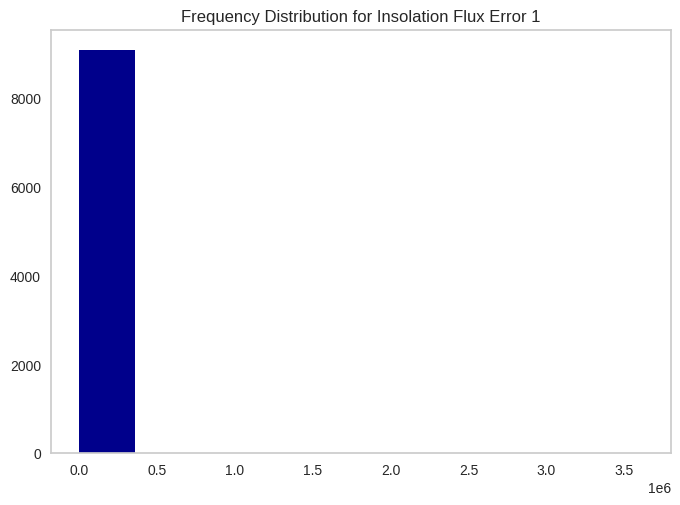

In [ ]:
plt.hist(missing_error_values_df["koi_insol_err1"].values, color="darkblue")
plt.title("Frequency Distribution for Insolation Flux Error 1")
plt.grid()

In [ ]:

df["koi_insol_err2"].fillna(np.nanpercentile(missing_error_values_df["koi_insol_err2"].values, 50), inplace = True)

In [ ]:

df["koi_insol_err2"] = df["koi_insol_err2"].fillna(
    np.nanpercentile(missing_error_values_df["koi_insol_err2"].values, 50)
)


Replacing NaN in Stellar Effective Temperature

Viewing Frequency Distribution

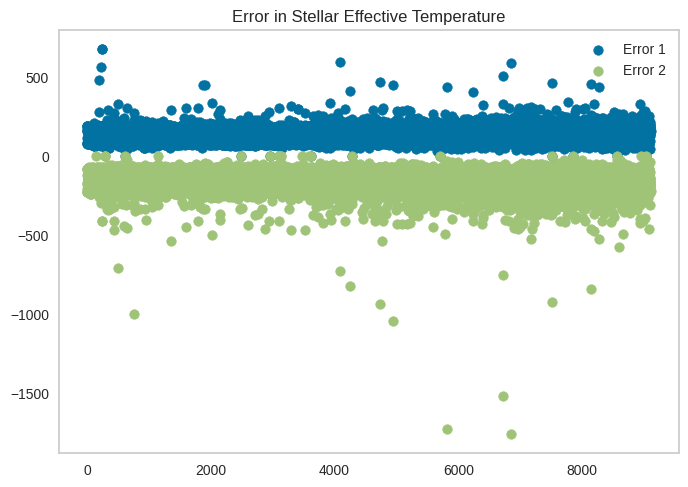

In [ ]:
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_steff_err1"].values, label = "Error 1")
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_steff_err2"].values, label = "Error 2")
plt.title("Error in Stellar Effective Temperature")
plt.legend()
plt.grid()


POSITIVE ERROR

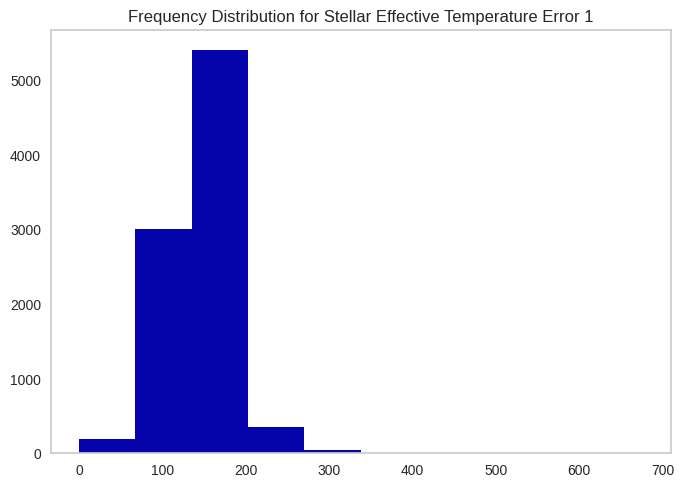

In [ ]:
plt.hist(missing_error_values_df["koi_steff_err1"].values, color="#0504aa")
plt.title("Frequency Distribution for Stellar Effective Temperature Error 1")
plt.grid()

In [ ]:
df["koi_steff_err1"].fillna(np.nanpercentile(missing_error_values_df["koi_steff_err1"].values, 50), inplace = True)

In [ ]:
df["koi_steff_err1"] = df["koi_steff_err1"].fillna(
    np.nanpercentile(missing_error_values_df["koi_steff_err1"].values, 50)
)


Replacing NaN in Surface Gravity

Viewing Frequency Distribution

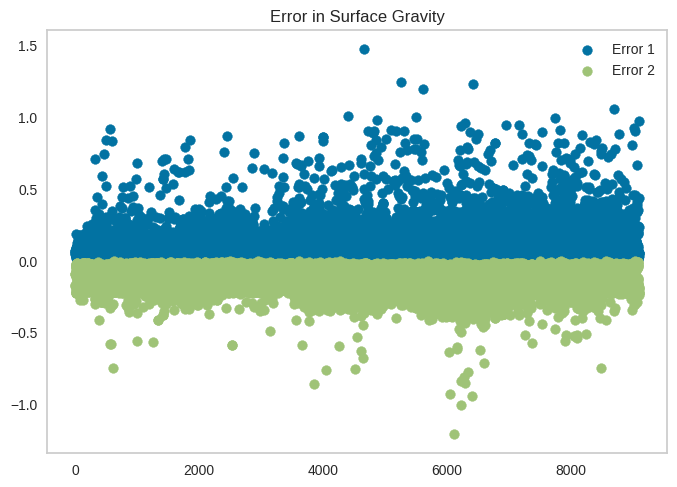

In [ ]:
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_slogg_err1"].values, label = "Error 1")
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_slogg_err2"].values, label = "Error 2")
plt.title("Error in Surface Gravity")
plt.legend()
plt.grid()

POSITIVE ERROR

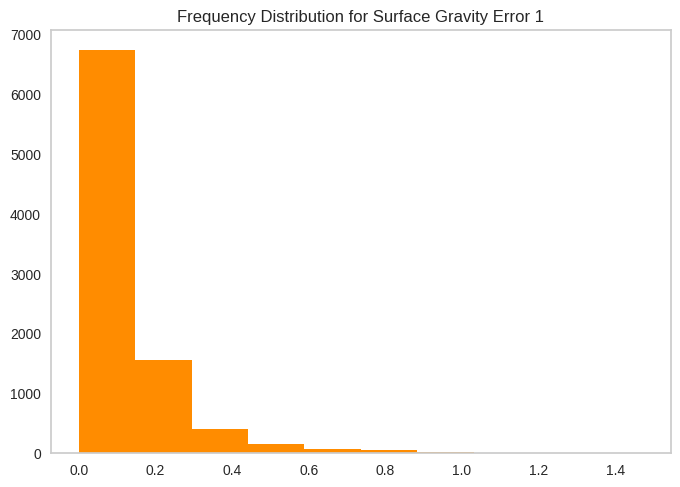

In [ ]:
plt.hist(missing_error_values_df["koi_slogg_err1"].values, color="darkorange")
plt.title("Frequency Distribution for Surface Gravity Error 1")
plt.grid()

In [ ]:
df["koi_slogg_err1"].fillna(np.nanpercentile(missing_error_values_df["koi_slogg_err1"].values, 50), inplace = True)

In [ ]:
df["koi_slogg_err1"] = df["koi_slogg_err1"].fillna(
    np.nanpercentile(missing_error_values_df["koi_slogg_err1"].values, 50)
)


NEGATIVE ERROR

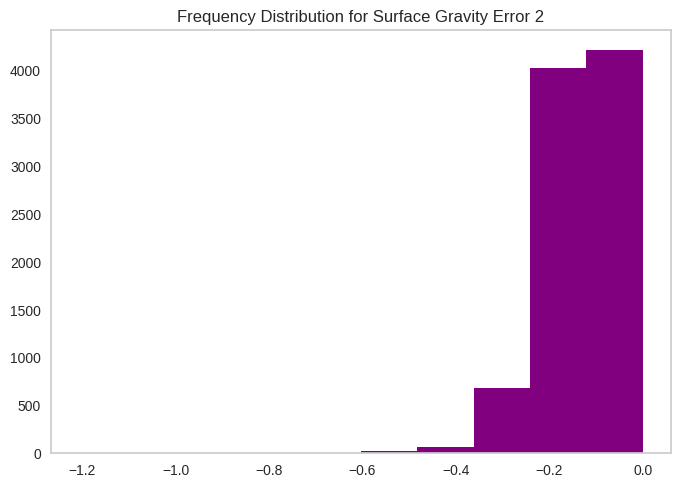

In [ ]:
plt.hist(missing_error_values_df["koi_slogg_err2"].values, color = "purple")
plt.title("Frequency Distribution for Surface Gravity Error 2")
plt.grid()

In [ ]:
# OG
df["koi_slogg_err2"].fillna(np.nanpercentile(
  missing_error_values_df["koi_slogg_err2"].values, 50), inplace = True)

In [ ]:
# GPT
df["koi_slogg_err2"] = df["koi_slogg_err2"].fillna(
    np.nanpercentile(missing_error_values_df["koi_slogg_err2"].values, 50)
)


Replacing NaN in Stellar Radius

Viewing Frequency Distribution

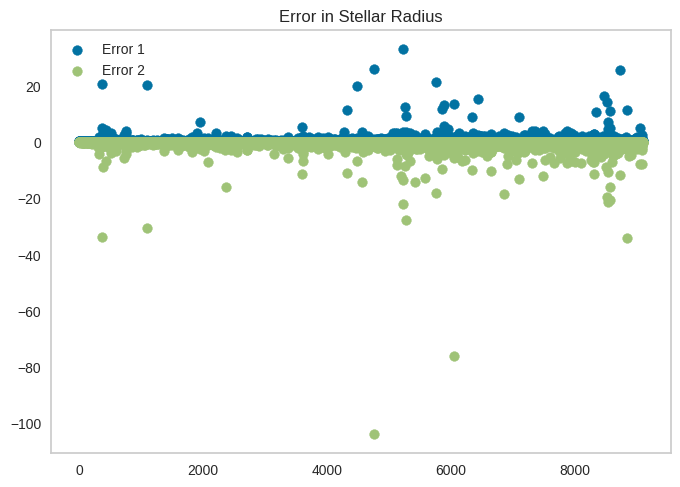

In [ ]:
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_srad_err1"].values, label = "Error 1")
plt.scatter(range(missing_error_values_df.shape[0]), missing_error_values_df["koi_srad_err2"].values, label = "Error 2")
plt.title("Error in Stellar Radius")
plt.legend()
plt.grid()


POSITIVE ERROR

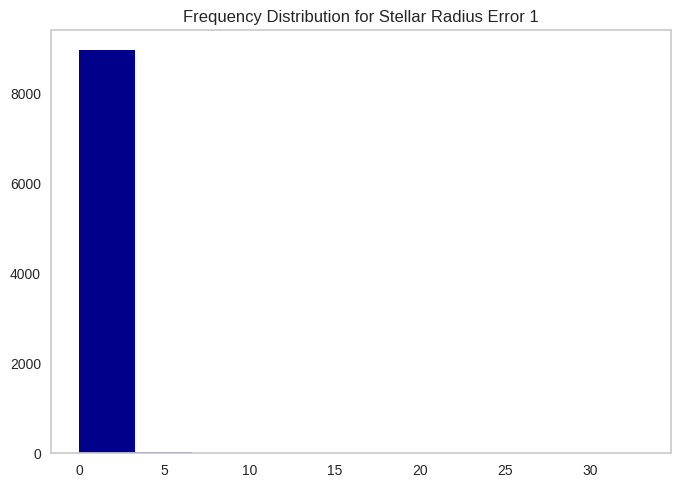

In [ ]:
plt.hist(missing_error_values_df["koi_srad_err1"].values, color="darkblue")
plt.title("Frequency Distribution for Stellar Radius Error 1")
plt.grid()

In [ ]:
df["koi_srad_err1"].fillna(np.nanpercentile(missing_error_values_df["koi_srad_err1"].values, 50), inplace = True)

In [ ]:
df["koi_srad_err1"] = df["koi_srad_err1"].fillna(
    np.nanpercentile(missing_error_values_df["koi_srad_err1"].values, 50)
)


NEGATIVE ERROR

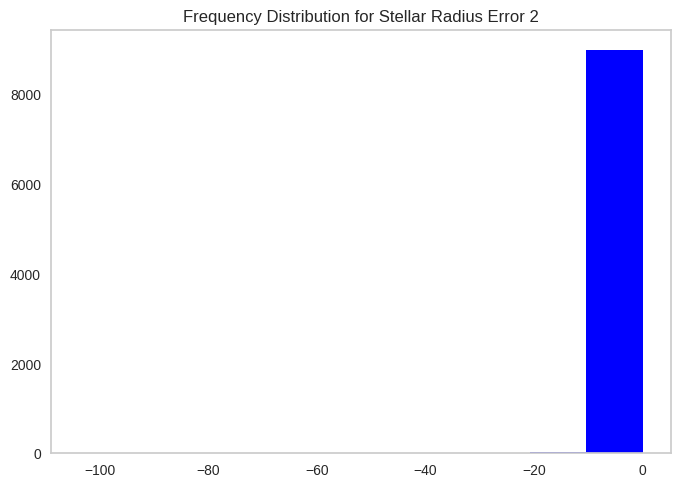

In [ ]:
plt.hist(missing_error_values_df["koi_srad_err2"].values, color="blue")
plt.title("Frequency Distribution for Stellar Radius Error 2")
plt.grid()

In [ ]:
df["koi_srad_err2"].fillna(np.nanpercentile(missing_error_values_df["koi_srad_err2"].values, 50), inplace = True)

In [ ]:
## GPT
df["koi_srad_err2"] = df["koi_srad_err2"].fillna(np.nanpercentile(missing_error_values_df["koi_srad_err2"].values, 50))


Finding Errors in Non-Error Attributes

In [ ]:
nan_columns = df.isnull().sum()
nan_columns = {col:count for col, count in nan_columns.items() if count >0}
pp.pprint(nan_columns)

{  'kepler_name': 6810,
   'koi_kepmag': 1,
   'koi_score': 1199,
   'koi_steff_err2': 111,
   'koi_tce_delivname': 248,
   'koi_tce_plnt_num': 248}


Replacing NaN in Transit Depth

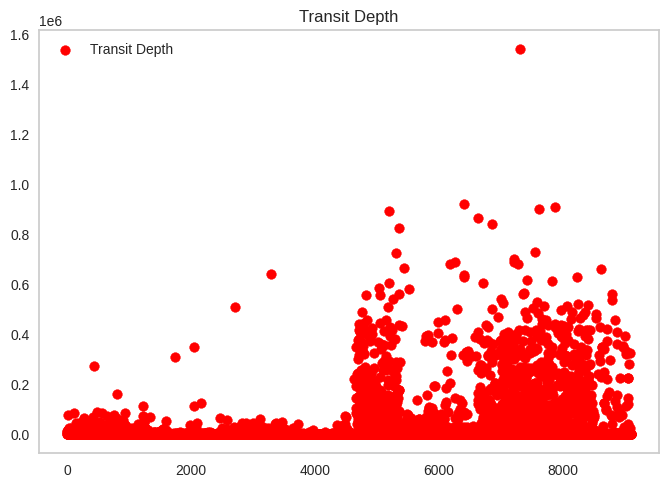

In [ ]:
plt.scatter(range(df.shape[0]), df["koi_depth"].values, label = "Transit Depth", color ="red")
plt.title("Transit Depth")
plt.legend()
plt.grid()

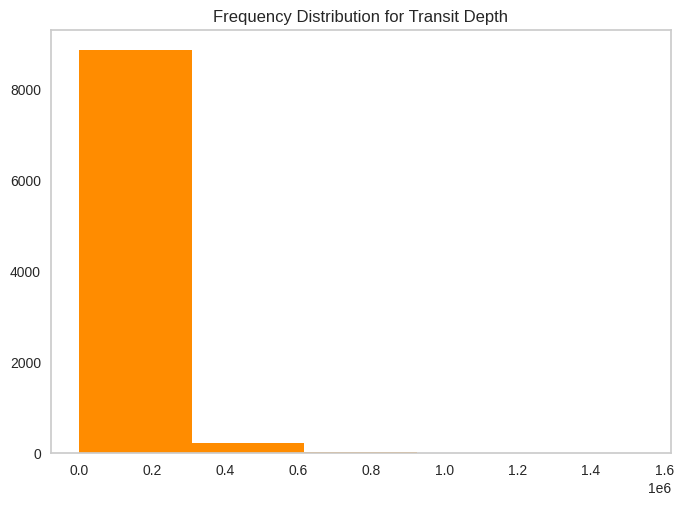

In [ ]:
plt.hist(df["koi_depth"].values, bins=5, color="darkorange")
plt.title("Frequency Distribution for Transit Depth")
plt.grid()

In [ ]:
df["koi_depth"].fillna(np.nanpercentile(df["koi_depth"].values, 50), inplace = True)

Replacing NaN in Impact Parameter

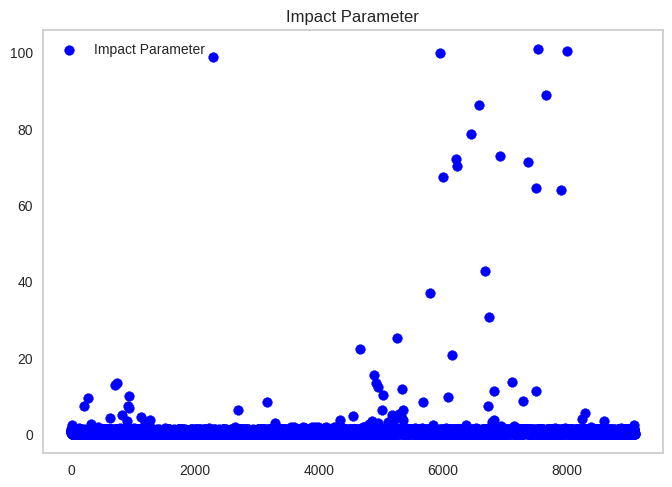

In [ ]:
plt.scatter(range(df.shape[0]), df["koi_impact"].values, label = "Impact Parameter", color="blue")
plt.title("Impact Parameter")
plt.legend()
plt.grid()

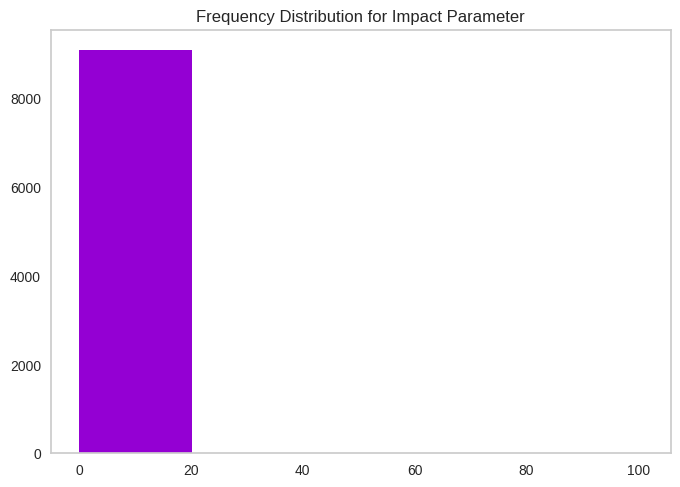

In [ ]:
plt.hist(df["koi_impact"].values, bins=5, color="darkviolet")
plt.title("Frequency Distribution for Impact Parameter")
plt.grid()

In [ ]:
df["koi_impact"].fillna(np.nanpercentile(df["koi_impact"].values, 50), inplace = True)

Replacing NaN in Insolation Flux

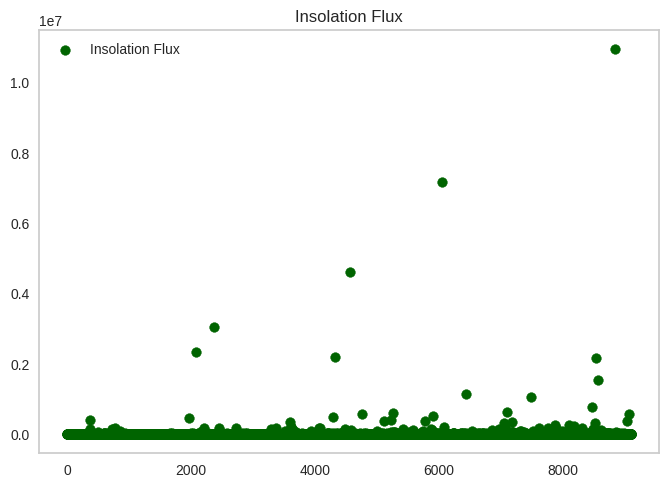

In [ ]:
plt.scatter(range(df.shape[0]), df["koi_insol"].values, label = "Insolation Flux", color="darkgreen")
plt.title("Insolation Flux")
plt.legend()
plt.grid()

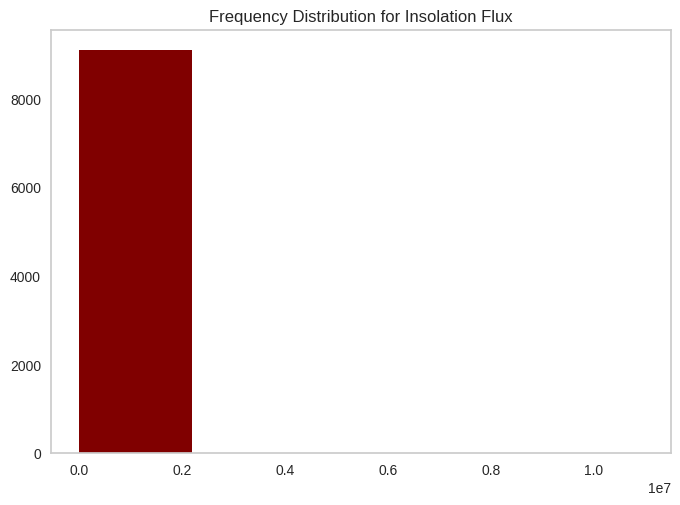

In [ ]:
plt.hist(df["koi_insol"].values, bins=5, color="maroon")
plt.title("Frequency Distribution for Insolation Flux")
plt.grid()

In [ ]:
df["koi_insol"].fillna(np.nanpercentile(df["koi_insol"].values, 50), inplace = True)

Replacing NaN in Kepler Band Magnitude

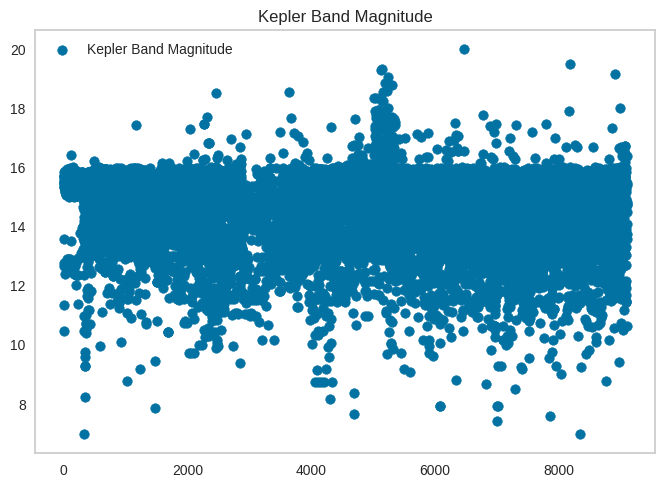

In [ ]:
plt.scatter(range(df.shape[0]), df["koi_kepmag"].values, label = "Kepler Band Magnitude")
plt.title("Kepler Band Magnitude")
plt.legend()
plt.grid()

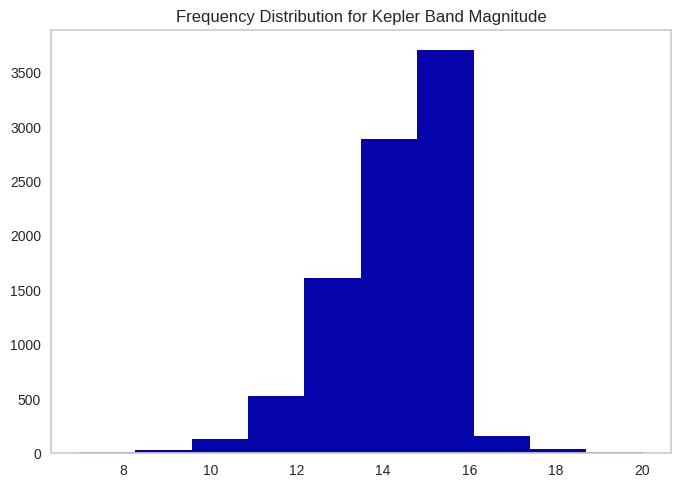

In [ ]:
plt.hist(df["koi_kepmag"].values, color="#0504aa")
plt.title("Frequency Distribution for Kepler Band Magnitude")
plt.grid()

In [ ]:
df["koi_kepmag"].fillna(np.nanpercentile(df["koi_kepmag"].values, 50), inplace = True)

Replacing NaN in Transit Signal to Noise Ratio

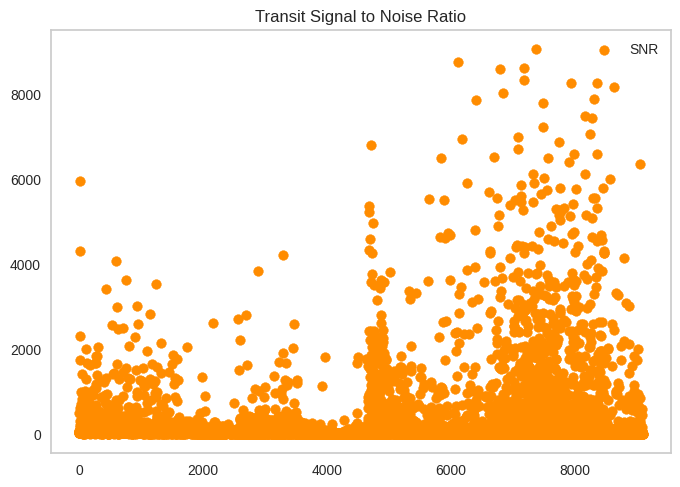

In [ ]:
plt.scatter(range(df.shape[0]), df["koi_model_snr"].values, label = "SNR", color="darkorange")
plt.title("Transit Signal to Noise Ratio")
plt.legend()
plt.grid()

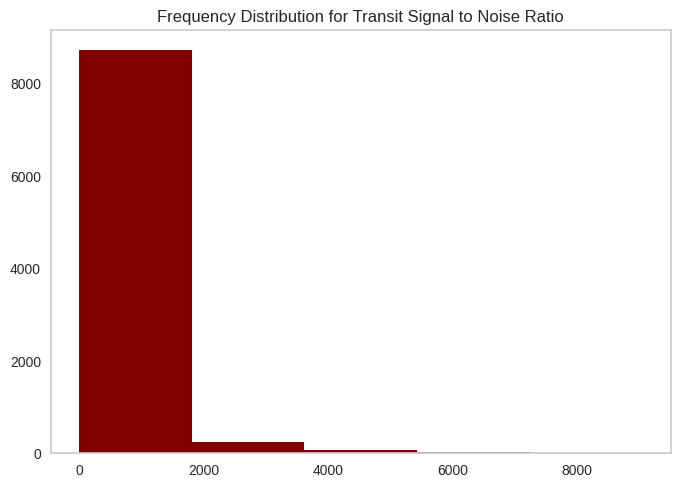

In [ ]:
plt.hist(df["koi_model_snr"].values, bins=5, color="maroon")
plt.title("Frequency Distribution for Transit Signal to Noise Ratio")
plt.grid()

In [ ]:
df["koi_model_snr"].fillna(np.nanpercentile(df["koi_model_snr"].values, 50), inplace = True)

Replacing NaN in Planet Radius

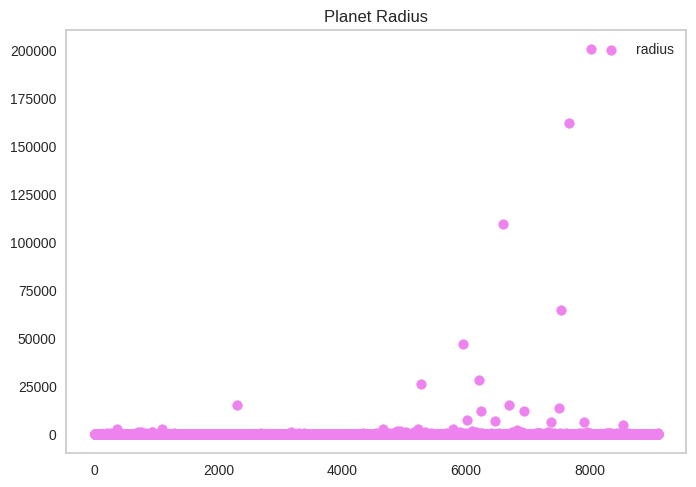

In [ ]:
plt.scatter(range(df.shape[0]), df["koi_prad"].values, label = "radius", color="violet" )
plt.title("Planet Radius")
plt.legend()
plt.grid()


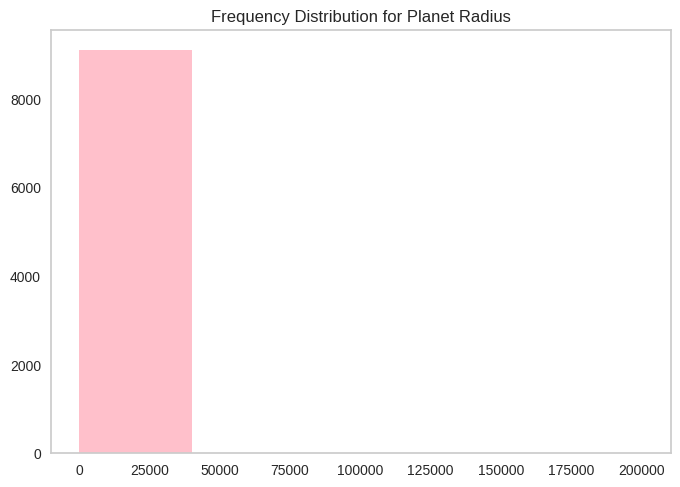

In [ ]:
plt.hist(df["koi_prad"].values, bins=5, color="pink")
plt.title("Frequency Distribution for Planet Radius")
plt.grid()


In [ ]:
df["koi_prad"].fillna(np.nanpercentile(df["koi_prad"].values, 50), inplace = True)

Replacing NaN in Disposition Score

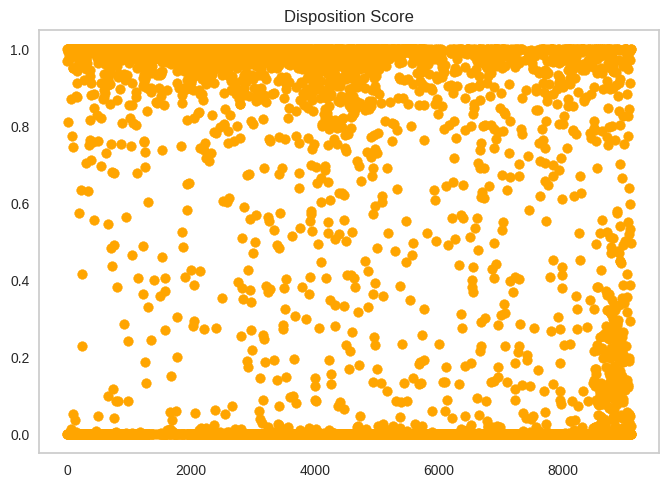

In [ ]:
plt.scatter(range(df.shape[0]), df["koi_score"].values, label = "Score", color="orange")
plt.title("Disposition Score")
plt.grid()

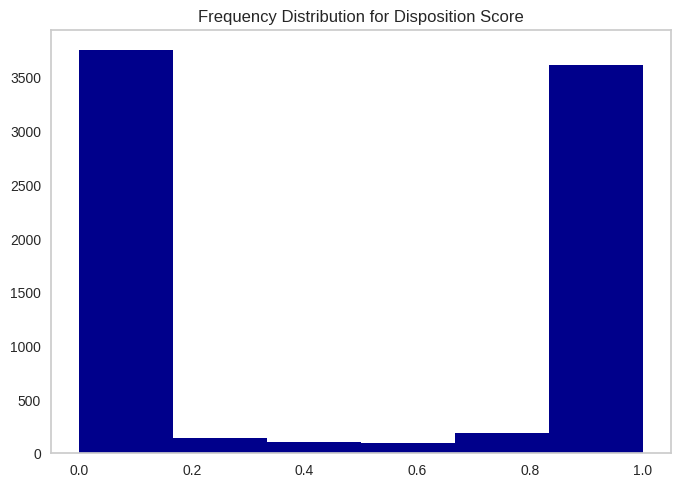

In [ ]:
plt.hist(df["koi_score"].values, color="darkblue", bins=6)
plt.title("Frequency Distribution for Disposition Score")
plt.grid()

In [ ]:
df["koi_score"].fillna(np.nanpercentile(df["koi_score"].values, 50), inplace = True)

Replacing NaN in Stellar Surface Gravity

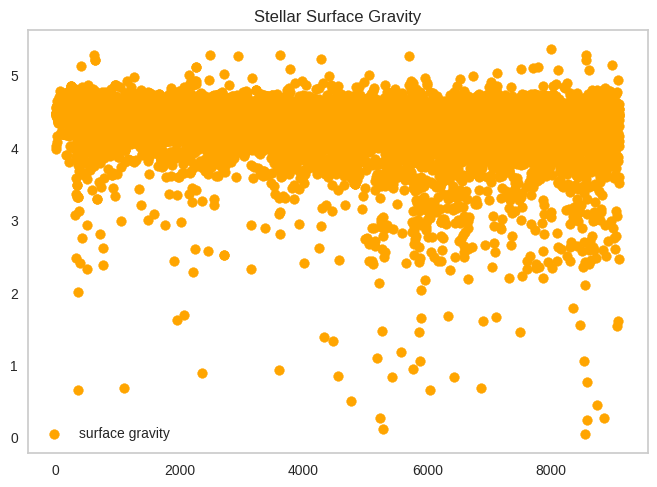

In [ ]:
plt.scatter(range(df.shape[0]), df["koi_slogg"].values, label = "surface gravity", color="orange")
plt.title("Stellar Surface Gravity")
plt.legend()
plt.grid()

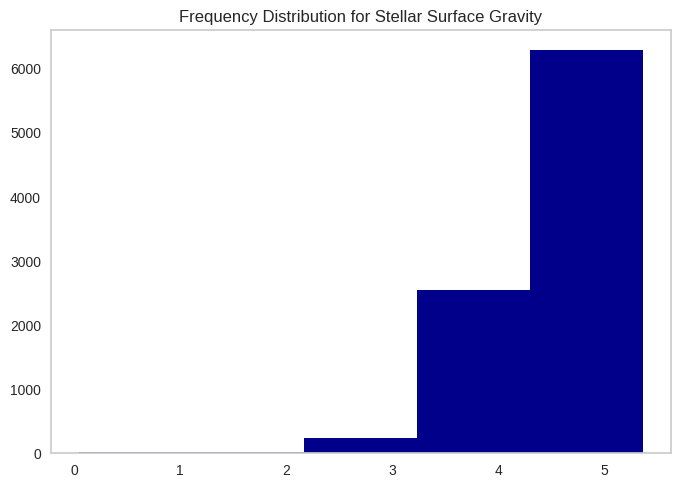

In [ ]:
plt.hist(df["koi_slogg"].values, bins=5, color="darkblue")
plt.title("Frequency Distribution for Stellar Surface Gravity")
plt.grid()

In [ ]:
df["koi_slogg"].fillna(np.nanpercentile(df["koi_slogg"].values, 50), inplace = True)

Replacing NaN in Stellar Radius

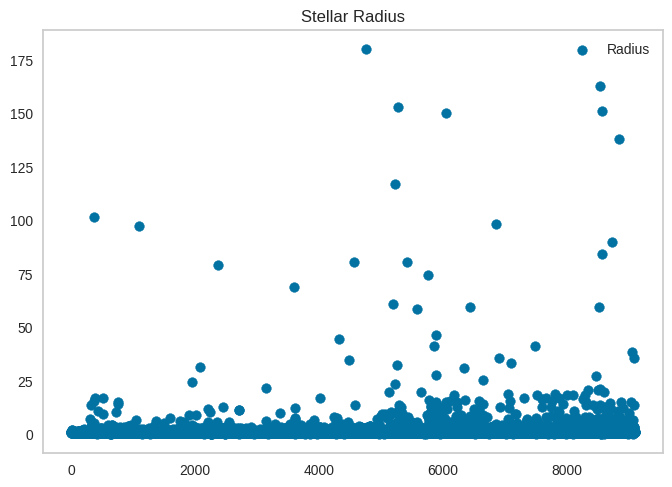

In [ ]:
plt.scatter(range(df.shape[0]), df["koi_srad"].values, label = "Radius")
plt.title("Stellar Radius")
plt.legend()
plt.grid()

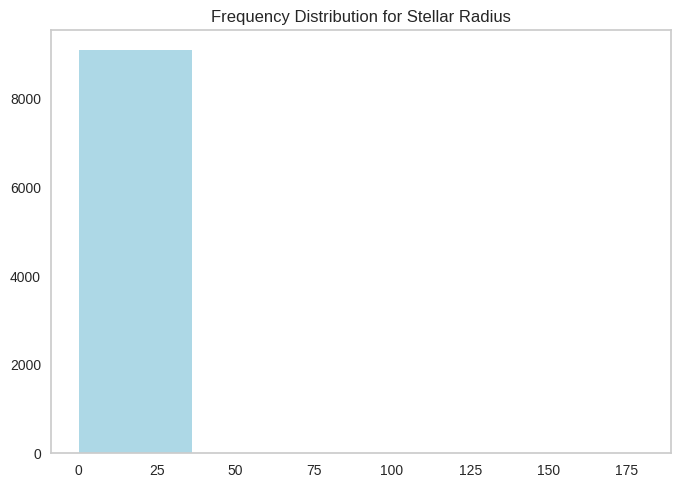

In [ ]:
plt.hist(df["koi_srad"].values, color="lightblue", bins = 5)
plt.title("Frequency Distribution for Stellar Radius")
plt.grid()

In [ ]:
df["koi_srad"].fillna(np.nanpercentile(df["koi_srad"].values, 50), inplace = True)

Replacing NaN in Stellar Effective Temperature

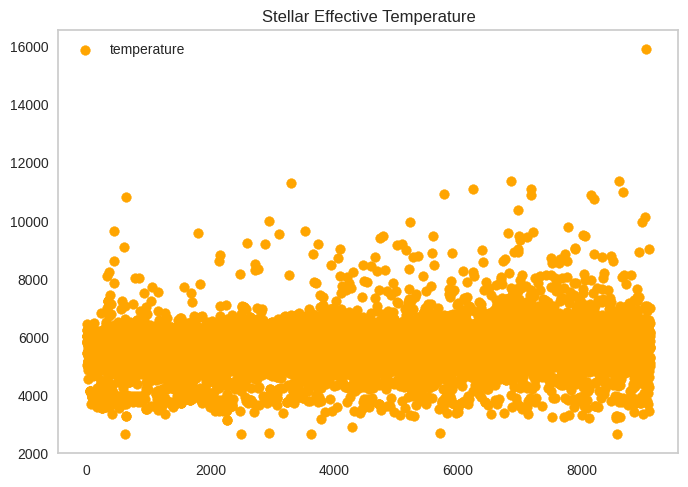

In [ ]:
plt.scatter(range(df.shape[0]), df["koi_steff"].values, label = "temperature", color="orange")
plt.title("Stellar Effective Temperature")
plt.legend()
plt.grid()


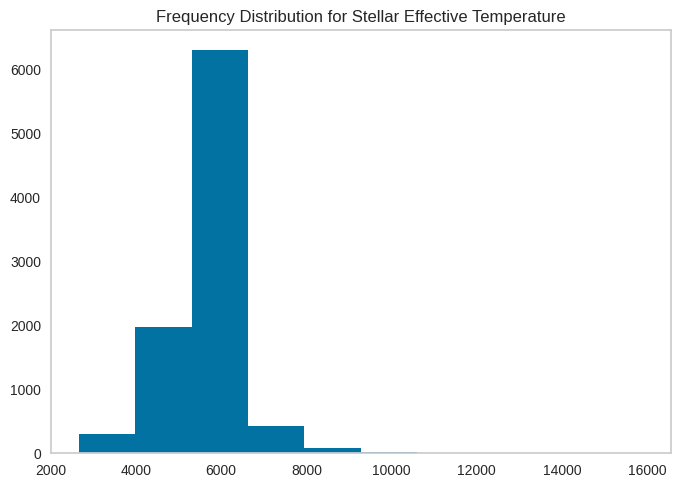

In [ ]:
plt.hist(df["koi_steff"].values,)
plt.title("Frequency Distribution for Stellar Effective Temperature")
plt.grid()

In [ ]:
df["koi_steff"].fillna(np.nanpercentile(df["koi_steff"].values, 50), inplace = True)

Replacing NaN in Equilibrium Temperature

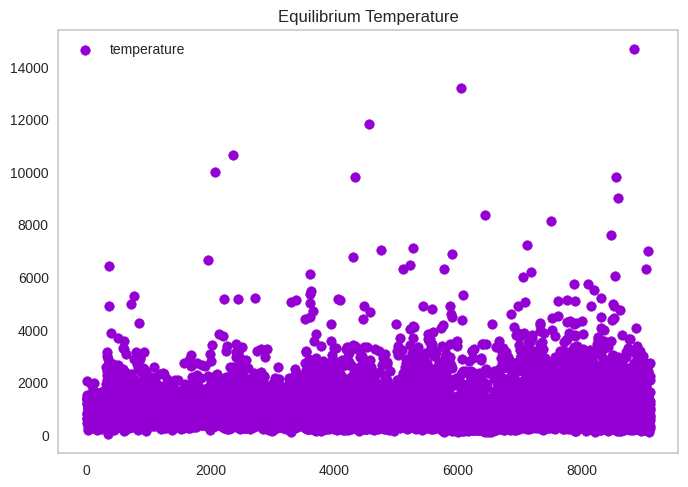

In [ ]:
plt.scatter(range(df.shape[0]), df["koi_teq"].values, label = "temperature", color="darkviolet")
plt.title("Equilibrium Temperature")
plt.legend()
plt.grid()

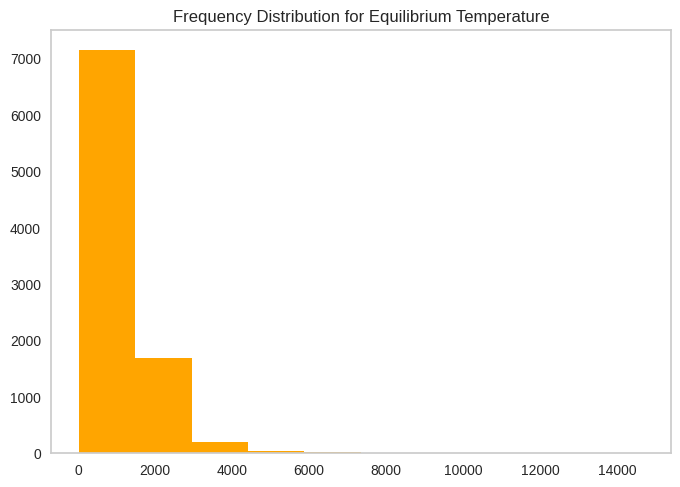

In [ ]:
plt.hist(df["koi_teq"].values, color="orange")
plt.title("Frequency Distribution for Equilibrium Temperature")
plt.grid()

In [ ]:
df["koi_teq"].fillna(np.nanpercentile(df["koi_teq"].values, 50), inplace = True)

Re-Counting NaNs

In [ ]:
nan_columns = df.isnull().sum()
nan_columns = {col:count for col, count in nan_columns.items() if count >0}
pp.pprint(nan_columns)

{  'kepler_name': 6810,
   'koi_steff_err2': 111,
   'koi_tce_delivname': 248,
   'koi_tce_plnt_num': 248}


In [ ]:
import pandas as pd

# Load the dataset (if not already loaded)
df = pd.read_csv('kepler-data.csv')

# Create NaN summary table
nan_summary = df.isnull().sum().reset_index()
nan_summary.columns = ['Column Name', 'Number of NaN Values']

# Display the table
print(nan_summary)


          Column Name  Number of NaN Values
0               rowid                     0
1               kepid                     0
2          kepoi_name                     0
3         kepler_name                  7270
4     koi_disposition                     0
5    koi_pdisposition                     0
6           koi_score                  1510
7       koi_fpflag_nt                     0
8       koi_fpflag_ss                     0
9       koi_fpflag_co                     0
10      koi_fpflag_ec                     0
11         koi_period                     0
12    koi_period_err1                   454
13    koi_period_err2                   454
14        koi_time0bk                     0
15   koi_time0bk_err1                   454
16   koi_time0bk_err2                   454
17         koi_impact                   363
18    koi_impact_err1                   454
19    koi_impact_err2                   454
20       koi_duration                     0
21  koi_duration_err1           

SAVING CLEANED DATASET

PART-2 USING THE CLEANED DATASET

In [ ]:
df = pd.read_csv("/content/cleanedcumalative.csv")
df.drop(columns = ["Unnamed: 0"], inplace=True)
print(df.shape)
df.head(10)

(9110, 47)


,rowid,kepid,kepoi_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
5,6,10872983,K00756.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,7,10872983,K00756.02,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
7,8,10872983,K00756.03,CONFIRMED,CANDIDATE,0.992,0,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
8,9,6721123,K00114.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,...,-124.0,3.986,0.182,-0.098,1.958,0.322,-0.483,298.86435,42.151569,12.660
9,10,10910878,K00757.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-83.0,4.485,0.083,-0.028,0.848,0.033,-0.072,286.99948,48.375790,15.841


Selecting Columns for Analysis
We eliminate all the columns that are either of the following

Assigned after other values are measured from readings
Contain ID or name attributes
Are error attributes
There are namely 6 types of exoplanets

In [ ]:
ALL_COLUMNS = df.columns
ERROR_COLUMNS = [col for col in ALL_COLUMNS if "err" in col]
EXCLUDE = ["rowid", "kepid", "kepoi_name", "koi_score", "koi_disposition", "koi_pdisposition", "koi_tce_delivname", "koi_tce_plnt_num"] + ERROR_COLUMNS
TO_USE = list(set(ALL_COLUMNS) - set(EXCLUDE))


In [ ]:
print(len(TO_USE))
df[TO_USE].head()

19


,koi_prad,koi_teq,dec,koi_fpflag_ss,koi_fpflag_co,koi_model_snr,koi_impact,koi_srad,koi_period,koi_steff,koi_fpflag_ec,koi_duration,koi_fpflag_nt,koi_kepmag,ra,koi_slogg,koi_insol,koi_time0bk,koi_depth
0,2.26,793.0,48.141651,0,0,35.8,0.146,0.927,9.488036,5455.0,0,2.95750,0,15.347,291.93423,4.467,93.59,170.538750,615.8
1,2.83,443.0,48.141651,0,0,25.8,0.586,0.927,54.418383,5455.0,0,4.50700,0,15.347,291.93423,4.467,9.11,162.513840,874.8
2,14.60,638.0,48.134129,1,0,76.3,0.969,0.868,19.899140,5853.0,0,1.78220,0,15.436,297.00482,4.544,39.30,175.850252,10829.0
3,33.46,1395.0,48.285210,1,0,505.6,1.276,0.791,1.736952,5805.0,0,2.40641,0,15.597,285.53461,4.564,891.96,170.307565,8079.2
4,2.75,1406.0,48.226200,0,0,40.9,0.701,1.046,2.525592,6031.0,0,1.65450,0,15.509,288.75488,4.438,926.16,171.595550,603.3


This preprocessing step helps:

Simplify the dataset

Remove noisy or non-informative columns

Select relevant physical features for clustering or model training

This block of code is selecting a subset of features (columns) from the dataset to use for machine learning or clustering, by excluding irrelevant or redundant ones.

Extracting Dataframe Subset
We extract only those rows which are CONFIRMED examples i.e. the disposition value is CONFIRMED.

In [ ]:
new_df = df[df["koi_disposition"] == "CONFIRMED"]
print(new_df.shape)
new_df.head(10)


(2292, 47)


,rowid,kepid,kepoi_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
4,5,10854555,K00755.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
5,6,10872983,K00756.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,7,10872983,K00756.02,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
7,8,10872983,K00756.03,CONFIRMED,CANDIDATE,0.992,0,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
9,10,10910878,K00757.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-83.0,4.485,0.083,-0.028,0.848,0.033,-0.072,286.99948,48.375790,15.841
10,11,11446443,K00001.01,CONFIRMED,CANDIDATE,0.811,0,0,0,0,...,-78.0,4.457,0.024,-0.024,0.964,0.038,-0.038,286.80847,49.316399,11.338
11,12,10666592,K00002.01,CONFIRMED,CANDIDATE,1.000,0,1,0,0,...,-89.0,4.019,0.033,-0.027,1.952,0.099,-0.110,292.24728,47.969521,10.463
12,13,6922244,K00010.01,CONFIRMED,CANDIDATE,0.998,0,0,0,0,...,-137.0,4.169,0.055,-0.045,1.451,0.110,-0.110,281.28812,42.451080,13.563


Extracting Values

In [ ]:
X = new_df[TO_USE].values
y = new_df["koi_disposition"].values

In [ ]:
X_scaler = StandardScaler()
X_scaler.fit(X)
X_scaled = X_scaler.transform(X)

pca = PCA(n_components=2)
pca.fit(X_scaled)
X_2d = pca.transform(X_scaled)

In [ ]:
X_2d.shape

(2292, 2)

Visualisation

In [ ]:
def elbowVisualiser(model, metric=None):
    if metric is None:
        visualizer = KElbowVisualizer(model, k=(4,12))
    else:
        visualizer = KElbowVisualizer(model, k=(4,12), metric=metric)
    visualizer.fit(X)
    visualizer.show(f"{model}_elbow.png", dpi=600)


def interclusterDistanceVisualisation(model):
    visualizer = InterclusterDistance(model)
    visualizer.fit(X)
    visualizer.show(f"{model}_inter_cluster_dist.png", dpi=600)


def silhouetteVisualisation(model):
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(X)
    visualizer.show(f"{model}_ss.png", dpi=600)


def viewKMeansScatter(model):
    clust_labels = model.predict(X)
    temp_df = new_df[TO_USE].copy()
    temp_df["Class"] = clust_labels
    unique_classes = list(range(model.n_clusters))
    print(temp_df.groupby("Class").median())
    plt.grid()
    for cls in unique_classes:
        sub_df = temp_df[temp_df["Class"] == cls]
        temp_X = sub_df[[col for col in temp_df.columns if col != "Class"]].values
        temp_X_2d = pca.transform(X_scaler.transform(temp_X))
        plt.grid()
        #print(X_2d.shape)
        plt.scatter(temp_X_2d[:, 0], temp_X_2d[:, 1], label=cls)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend()
    plt.savefig(f"{model}_scatter.png", dpi=600)
    return temp_df.groupby("Class").median()

def viewAggScatter(model):
    clust_labels = model.fit_predict(X)
    temp_df = new_df[TO_USE].copy()
    temp_df["Class"] = clust_labels
    unique_classes = list(range(model.n_clusters))
    print(temp_df.groupby("Class").median())
    plt.grid()
    for cls in unique_classes:
        sub_df = temp_df[temp_df["Class"] == cls]
        temp_X = sub_df[[col for col in temp_df.columns if col != "Class"]].values
        temp_X_2d = pca.transform(X_scaler.transform(temp_X))
        #print(X_2d.shape)
        plt.grid()
        plt.scatter(temp_X_2d[:, 0], temp_X_2d[:, 1], label=cls)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend()
    plt.savefig(f"agg_scatter_{model}.png", dpi=600)
    plt.show()

def getVisualisationPCA(X, y):
    X = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(X)

    pca_df = pd.DataFrame(
        data = principal_components,
        columns = ['principal component 1', 'principal component 2']
    )

    pca_df["TARGET"] = y
    labels = np.unique(y)

    colors = cm.plasma(np.linspace(0, 1, len(labels)))
    plt.grid()
    for label, color in zip(labels, colors):
        indicesToKeep = pca_df['TARGET'] == label
        plt.scatter(
            pca_df.loc[indicesToKeep, 'principal component 1'],
            pca_df.loc[indicesToKeep, 'principal component 2'],
            c = color,
            label=label
        )

    plt.legend()
    plt.grid()

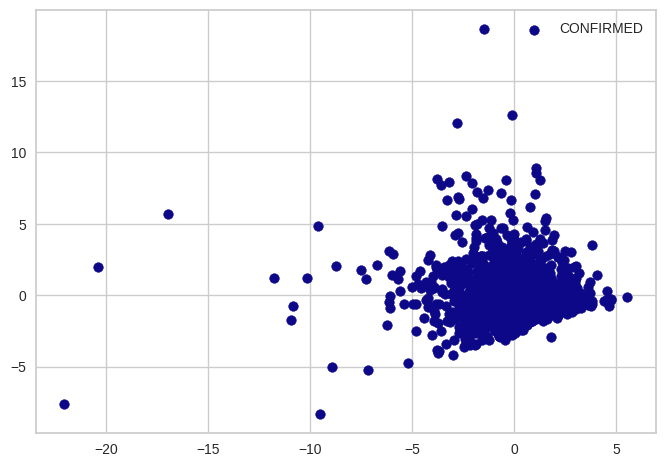

In [ ]:
getVisualisationPCA(X, y)

✅ Final Takeaway
Function Name	Why It's Used :
1. getVisualisationPCA	Compare actual labels in PCA space
2. elbowVisualiser	Find optimal number of clusters
3. silhouetteVisualisation	Evaluate cluster quality (separation)
4. interclusterDistanceVisualisation	Visualize cluster distances
5. viewKMeansScatter	Visualize KMeans clusters & interpret
6. viewAggScatter	Visualize Agglomerative clusters


These functions turn abstract clustering math into visual insight, helping you understand whether your clusters are coherent, well-separated, and meaningful.


KMeans Clustering:

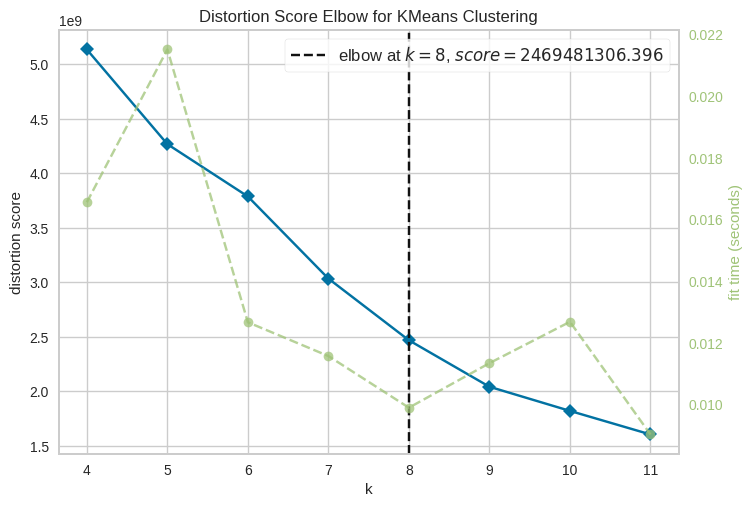

In [ ]:
model = KMeans(random_state=0)
elbowVisualiser(model)

In [ ]:
K=7
model = KMeans(K, max_iter=500, random_state=0)
model.fit(X)

KMeans(max_iter=500, n_clusters=7, random_state=0)

       koi_prad  koi_teq        dec  koi_fpflag_ss  koi_fpflag_co  \
Class                                                               
0         2.140    840.5  44.518215            0.0            0.0   
1        11.760   1016.0  44.811562            0.0            0.0   
2        10.395    948.5  43.655152            0.0            0.0   
3         4.275   2963.0  40.406872            0.0            0.0   
4         6.310    610.0  44.381580            0.0            0.0   
5         2.020    540.0  44.141949            0.0            0.0   
6         1.440   1746.5  44.204639            0.0            0.0   

       koi_model_snr  koi_impact  koi_srad  koi_period  koi_steff  \
Class                                                               
0              27.40      0.4090    1.0460   12.146762     5773.0   
1            1077.80      0.3210    0.8870    3.855604     5532.0   
2             562.20      0.2985    1.0785    8.063285     5752.5   
3              27.15      0.3595 

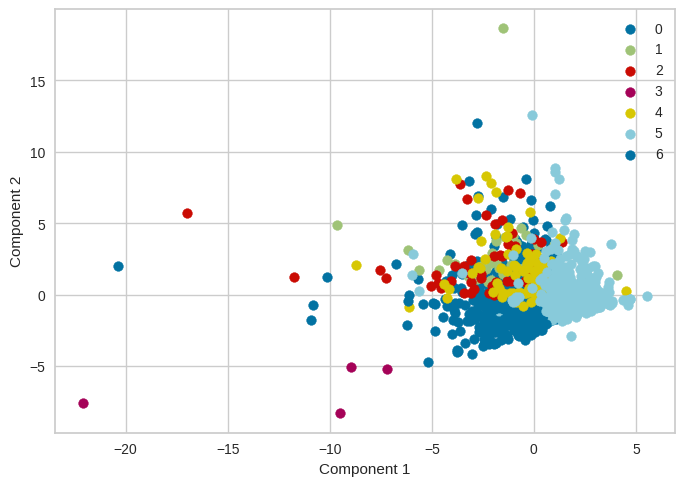

In [ ]:
t=viewKMeansScatter(model)

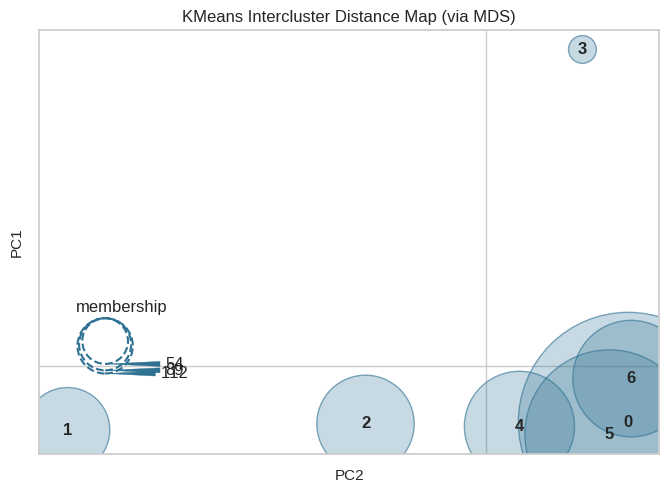

In [ ]:
interclusterDistanceVisualisation(model)

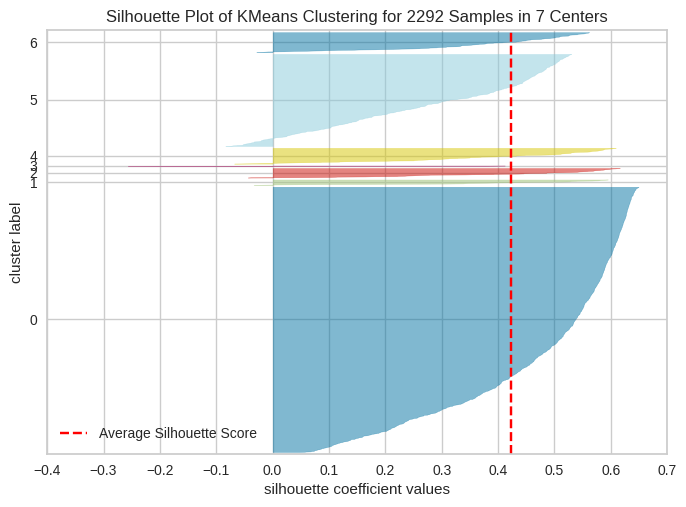

In [ ]:
silhouetteVisualisation(model)

Description:

Agglomerative Clustering:

In [ ]:
def plot_dendrogram(X):
    de = dendrogram(linkage(X, method='ward'))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.grid()
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.savefig("dendogram.png", dpi=600)

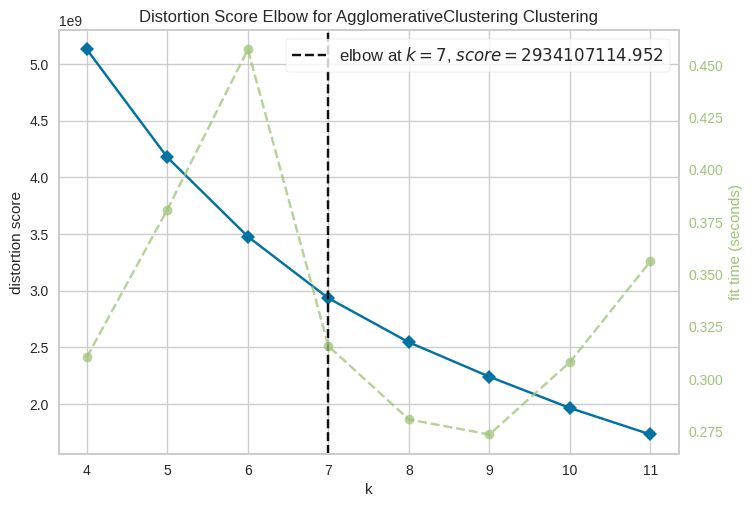

In [ ]:
model = AgglomerativeClustering()
elbowVisualiser(model)

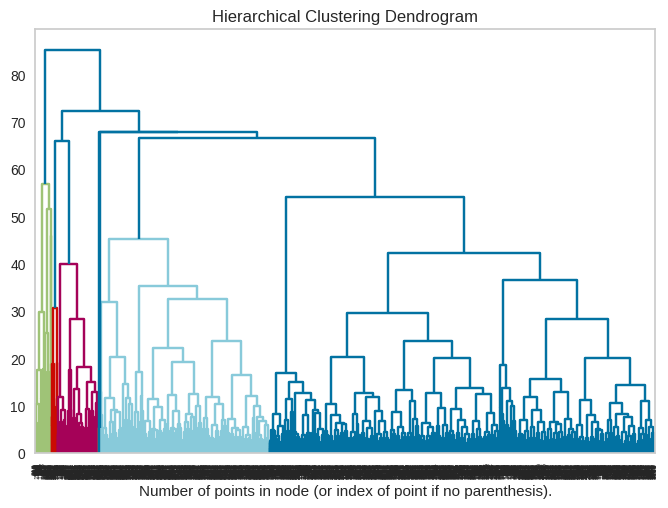

In [ ]:
plot_dendrogram(X_scaled)


       koi_prad  koi_teq        dec  koi_fpflag_ss  koi_fpflag_co  \
Class                                                               
0          9.11    769.0  43.680962            0.0            0.0   
1          1.46   1774.0  44.292549            0.0            0.0   
2          2.34    585.5  44.149569            0.0            0.0   
3         11.83   3372.5  44.545265            0.5            0.0   
4         12.19    730.0  41.944069            0.0            0.0   
5          1.95    899.0  44.521124            0.0            0.0   
6         11.30   1017.0  45.439678            0.0            0.0   

       koi_model_snr  koi_impact  koi_srad  koi_period  koi_steff  \
Class                                                               
0             370.80       0.284    1.0810   12.611904     5758.0   
1              26.50       0.271    1.2500    1.340597     5718.0   
2              37.55       0.421    0.7850   13.759590     5052.0   
3            2041.40       0.725 

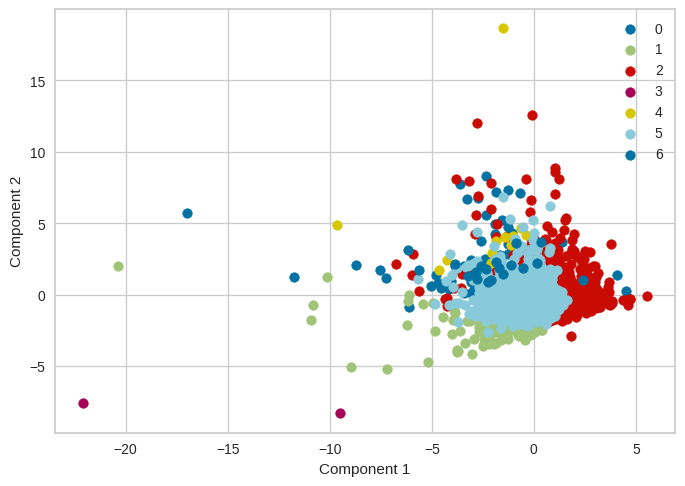

In [ ]:
K=7
model = AgglomerativeClustering(n_clusters=K)
viewAggScatter(model)

Description


Obtaining Trends

In [ ]:
t.head()

,koi_prad,koi_teq,dec,koi_fpflag_ss,koi_fpflag_co,koi_model_snr,koi_impact,koi_srad,koi_period,koi_steff,koi_fpflag_ec,koi_duration,koi_fpflag_nt,koi_kepmag,ra,koi_slogg,koi_insol,koi_time0bk,koi_depth
Class,,,,,,,,,,,,,,,,,,,
0,2.140,840.5,44.518215,0.0,0.0,27.40,0.4090,1.0460,12.146762,5773.0,0.0,4.033950,0.0,14.3070,291.302220,4.3940,118.030,139.970415,341.25
1,11.760,1016.0,44.811562,0.0,0.0,1077.80,0.3210,0.8870,3.855604,5532.0,0.0,2.821300,0.0,15.0110,292.068300,4.4910,251.480,169.890622,16814.00
2,10.395,948.5,43.655152,0.0,0.0,562.20,0.2985,1.0785,8.063285,5752.5,0.0,4.217505,0.0,14.5845,292.860000,4.4005,193.115,159.062760,8635.10
3,4.275,2963.0,40.406872,0.0,0.0,27.15,0.3595,2.6675,1.458958,6660.5,0.0,2.642650,0.0,12.5025,286.730805,3.8360,18786.170,131.817070,160.45
4,6.310,610.0,44.381580,0.0,0.0,217.40,0.3340,0.9720,18.009322,5671.0,0.0,5.214700,0.0,14.8220,292.236760,4.4630,32.670,170.449657,3714.70


In [ ]:
t.std()

,0
koi_prad,4.186990
koi_teq,857.018614
dec,1.508828
koi_fpflag_ss,0.000000
koi_fpflag_co,0.000000
koi_model_snr,402.581682
koi_impact,0.056333
koi_srad,0.659497
koi_period,6.318532
koi_steff,566.249997


MACHINE LEARNING ALGORITHMS
1. SVM (PART1)
2. ADABOOST (PART1)
3. RANDOM-FOREST (PART1)
4. NAIVE-BAYES (PART1)
5. K-MEANS (PART2)
6. DNN (PART3)
7. DECISION TREE (PART2)


CLASSICAL ML ALGORITHMS
1. SVM
2. ADABOOST
3. RANDOM FOREST

PART-3

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, classification_report, cohen_kappa_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from yellowbrick.target import FeatureCorrelation
from yellowbrick.features import rank2d, RadViz, Rank2D
from yellowbrick.classifier import DiscriminationThreshold, PrecisionRecallCurve, ROCAUC
from yellowbrick.model_selection import feature_importances, CVScores, RFECV, FeatureImportances
from yellowbrick.model_selection import LearningCurve, ValidationCurve
from yellowbrick.classifier import ClassificationReport, ClassPredictionError, ConfusionMatrix

In [ ]:
df = pd.read_csv("/content/cleanedcumalative.csv")
df.drop(columns = ["Unnamed: 0"], inplace=True)
print(df.shape)
df.head()

(9110, 47)


,rowid,kepid,kepoi_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


Selecting Columns for Prediction
We eliminate all the columns that are either of the following

1. Assigned after other values are measured from readings
2. Contain ID or name attributes
3. Are error attributes

In [ ]:
ALL_COLUMNS = df.columns
ERROR_COLUMNS = [col for col in ALL_COLUMNS if "err" in col]
EXCLUDE = ["rowid", "kepid", "kepoi_name", "koi_score", "koi_disposition", "koi_pdisposition", "koi_tce_delivname", "koi_tce_plnt_num"] + ERROR_COLUMNS
TO_USE = list(set(ALL_COLUMNS) - set(EXCLUDE))

In [ ]:
print(f"Columns being analysed: {len(TO_USE)}")
df[TO_USE].head()

Columns being analysed: 19


,koi_prad,koi_teq,dec,koi_fpflag_ss,koi_fpflag_co,koi_model_snr,koi_impact,koi_srad,koi_period,koi_steff,koi_fpflag_ec,koi_duration,koi_fpflag_nt,koi_kepmag,ra,koi_slogg,koi_insol,koi_time0bk,koi_depth
0,2.26,793.0,48.141651,0,0,35.8,0.146,0.927,9.488036,5455.0,0,2.95750,0,15.347,291.93423,4.467,93.59,170.538750,615.8
1,2.83,443.0,48.141651,0,0,25.8,0.586,0.927,54.418383,5455.0,0,4.50700,0,15.347,291.93423,4.467,9.11,162.513840,874.8
2,14.60,638.0,48.134129,1,0,76.3,0.969,0.868,19.899140,5853.0,0,1.78220,0,15.436,297.00482,4.544,39.30,175.850252,10829.0
3,33.46,1395.0,48.285210,1,0,505.6,1.276,0.791,1.736952,5805.0,0,2.40641,0,15.597,285.53461,4.564,891.96,170.307565,8079.2
4,2.75,1406.0,48.226200,0,0,40.9,0.701,1.046,2.525592,6031.0,0,1.65450,0,15.509,288.75488,4.438,926.16,171.595550,603.3


Extracting Dataframe Subset
* We extract only those rows which are either positive or negative examples i.e. the disposition value is not CANDIDATE. This is because CANDIDATE is the default value for all obects of interest picked up by Kepler. The labels CONFIRMED and FALSE POSITIVE serve as our positive and negative labels.

Difference between disposition and pdisposition?
* We can use either of the two columns as our target variable, since both of them contain the target labels we desire. While pdisposition gives us the most probable labels based on the physical explanation given by the readings, disposition values are based on the NASA Exoplanet Archive Data.

In [ ]:
np.unique(df["koi_disposition"].values)

array(['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE'], dtype=object)

In [ ]:
subset_df = df[df["koi_disposition"] != "CANDIDATE"]
print(subset_df.shape)
subset_df.head()

(6939, 47)


,rowid,kepid,kepoi_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


Obtaining X and y
We can encode the categorical labels to 1 and 0 for easier comparison

* CONFIRMED - 1
* FALSE POSITIVE - 0


In [ ]:
X = subset_df[TO_USE].values
y = subset_df["koi_disposition"].apply(lambda x: x=='CONFIRMED').astype(int).values

In [ ]:
subset_df["koi_disposition"].value_counts()

,count
koi_disposition,
FALSE POSITIVE,4647
CONFIRMED,2292


DATA VISUALIZATION

In [ ]:
def getVisualisationPCA(X, y):
    x = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(x)

    pca_df = pd.DataFrame(
        data = principal_components,
        columns = ['principal component 1', 'principal component 2']
    )

    pca_df["TARGET"] = y
    labels = np.unique(y)
    labels = ["CONFIRMED" if i ==1 else "FALSE POSITIVE" for i in labels]
    pca_df["TARGET"] = ["CONFIRMED" if i ==1 else "FALSE POSITIVE" for i in pca_df["TARGET"].values]
    plt.grid()
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, color in zip(labels, colors):
        indicesToKeep = pca_df['TARGET'] == label
        plt.scatter(
            pca_df.loc[indicesToKeep, 'principal component 1'],
            pca_df.loc[indicesToKeep, 'principal component 2'],
            c = color,
            label=label
        )

    plt.legend()
    plt.grid()
    plt.savefig("pca.png", dpi=600)

def getVarianceContribution(X, y):
    cols = X.shape[1]
    x = StandardScaler().fit_transform(X)
    pca = PCA().fit(x)
    variance = pca.explained_variance_ratio_
    s = np.sum(variance)
    p = variance/s
    plt.grid()
    plt.bar(list(range(1, cols+1)), p)
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.savefig("variance.png", dpi=600)
    plt.show()


def getFeatureCorrelation(X, y):
    visualizer = FeatureCorrelation(labels=TO_USE)
    visualizer.fit(X, y)
    #visualizer.show("correlation.png", dpi=600)


def getPearsonRanking(X):
    #visualizer = rank2d(X, features=TO_USE)
    visualizer = Rank2D(algorithm='pearson', features=TO_USE)
    visualizer.fit(X, y)
    visualizer.transform(X)
    #visualizer.show(outpath="pearson_ranking.png", dpi=600)


def getRadialViz(X, y):
    visualizer = RadViz(classes=[0, 1], features = TO_USE)
    visualizer.fit(X, y)
    visualizer.transform(X)
    #visualizer.show("radial.png", dpi=600)


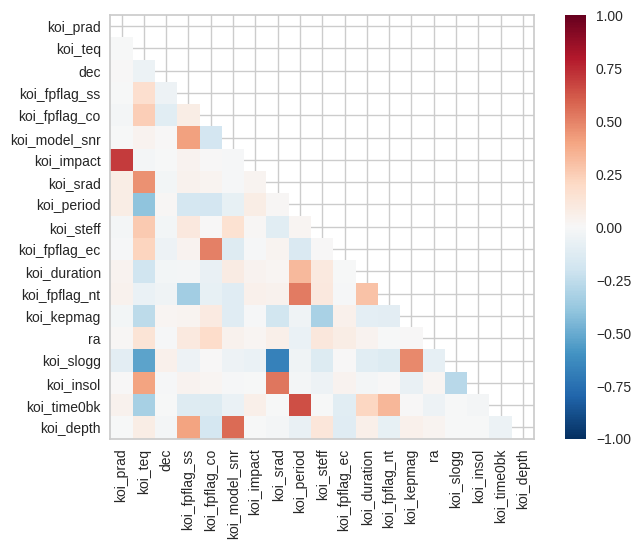

In [ ]:
getPearsonRanking(X)

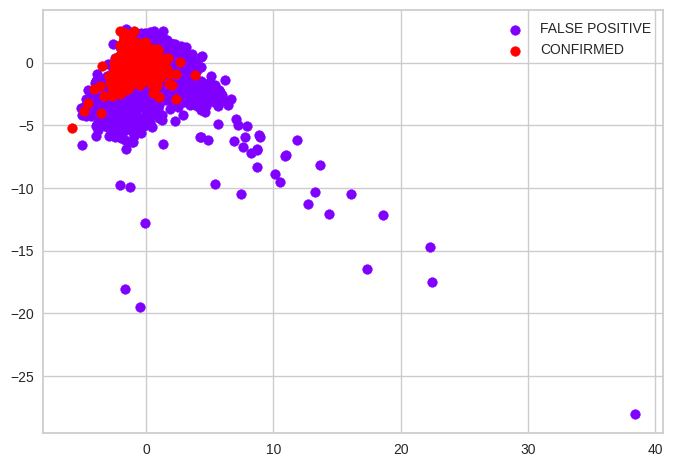

In [ ]:
getVisualisationPCA(X, y)
# diff

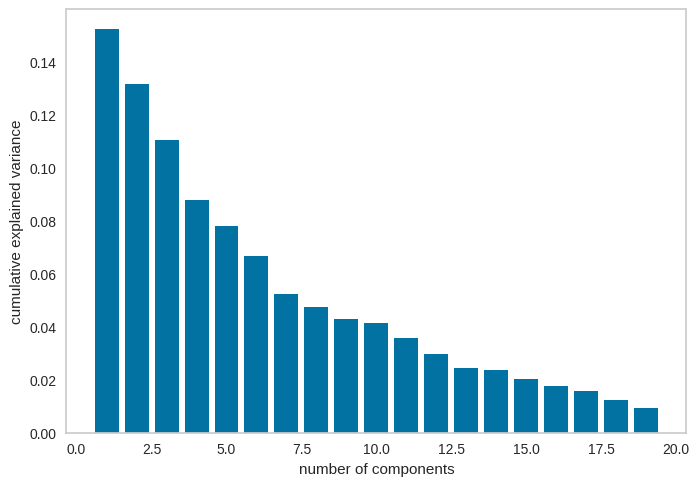

In [ ]:
getVarianceContribution(X, y)

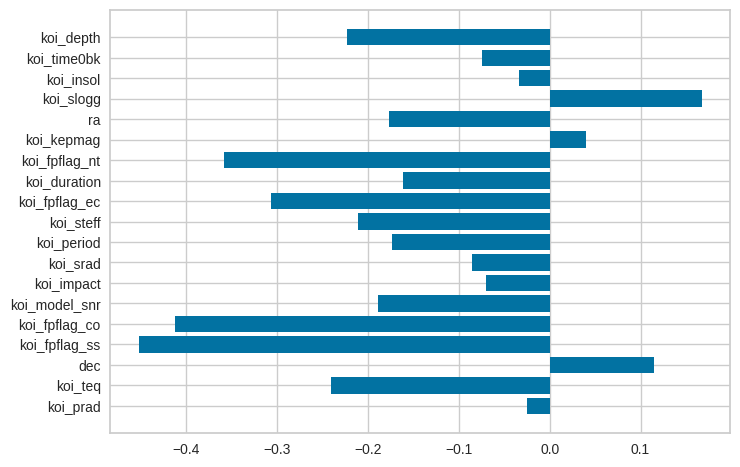

In [ ]:
getFeatureCorrelation(X, y)

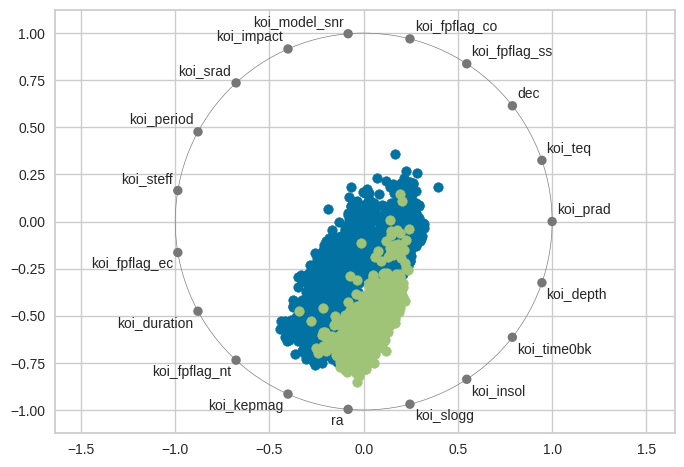

In [ ]:
getRadialViz(X, y)

1. We can see that our columns are not interdependent and we can use all our columns
2. We observe that the two classes are not linearly separable, hence a simple Logistic Regression classifier will not do well.
3. Most important, we see there is a class imbalance present, hence we cannot go on accuracy scores and will need to compare scores for prediction across both classes - F1 scores and balanced accuracy scores
We need to hence using different techniques of non-linear classification, which can handle the non-linearity issue as well as class imbalance. We can employ Bagging or Boosting Techniques such as

* SVM
* Random Forests
* AdaBoost

Splitting into Train and Test sets
* Scale the values to make the models less computationally expensive and convert all the values to the same range
* Split into train and test sets

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, stratify=y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4649, 19), (2290, 19), (4649,), (2290,))

Evaluation Metric
Since the dataset is imbalanced, we cannot use accuracy, hence we opt for the following -

* Confusion Matrix
* F1 Score
* Cohen Kappa Score
* Balanced Accuracy Score

In [ ]:
def performance(test, pred):
    conf_matrix = confusion_matrix(test, pred)
    f1 = f1_score(test, pred)
    report = classification_report(test, pred)
    accuracy = balanced_accuracy_score(test, pred)
    kappa = cohen_kappa_score(test, pred)
    print(f"F1 Score: {f1}")
    print(f"Kappa Score: {kappa}")
    print(f"Accuracy Score: {accuracy}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(report)

Cross Validation Score

In [ ]:
def crossValidationCheck(classifier, X, y, K=10):

    cv = KFold(n_splits=K, random_state=1, shuffle=True)
    scores = cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
    print(f"Average F1 score over {K}-Folds: {scores.mean()}")

    visualizer = CVScores(classifier, cv=cv, scoring='f1')
    visualizer.fit(X, y)
    #visualizer.show(f"{str(classifier)[:5]}_cv.png", dpi=600)

    visualizer = LearningCurve(classifier, cv=cv, scoring='f1', n_jobs=-1)
    visualizer.fit(X, y)
    #visualizer.show(f"{str(classifier)[:5]}_learn_curve.png", dpi=600)

    cv = StratifiedKFold(n_splits=K, random_state=1, shuffle=True)
    scores = cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
    print(f"Average F1 score over Stratified {K}-Folds: {scores.mean()}")

    visualizer = CVScores(classifier, cv=cv, scoring='f1')
    visualizer.fit(X, y)
    #visualizer.show(f"{str(classifier)[:5]}_cv_strat.png", dpi=600)

    visualizer = LearningCurve(classifier, cv=cv, scoring='f1', n_jobs=-1)
    visualizer.fit(X, y)
    #visualizer.show(f"{str(classifier)[:5]}_learn_curve_strat.png", dpi=600)

FEATURE IMPORTANCE

In [ ]:
def getFeatureImportance(model, X, y):
    viz = FeatureImportances(model, labels=TO_USE)
    viz.fit(X, y)
    # viz.show(f"{model}_imp.png", dpi=600)

CLASS PREDICTIONS

In [ ]:
def getClassPredictionError(classifier):
    visualizer = ClassPredictionError(classifier, classes=[0, 1])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    #visualizer.show(f"{classifier}_pred_error.png", dpi=600)

def getClassificationReport(classifier):
    visualizer = ClassificationReport(classifier, classes=[0, 1])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    #visualizer.show(f"{classifier}_report.png", dpi=600)

def getDiscriminationThreshold(classifier):
    visualizer = DiscriminationThreshold(classifier, exclude=["queue_rate"])
    visualizer.fit(X, y)
    #visualizer.show(f"{classifier}_disc_thresh.png", dpi=600)

def getPrecisionRecall(classifier):
    visualizer = PrecisionRecallCurve(classifier)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    #visualizer.show(f"{classifier}_pr.png", dpi=600)

def rocCurve(classifier):
    visualizer = ROCAUC(classifier, classes=[0, 1])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    #visualizer.show(f"{classifier}_roc.png", dpi=600)

Recursive Feature Elimination

In [ ]:
def getFeatureElimination(classifier, X, y):
    visualizer = RFECV(classifier)
    visualizer.fit(X, y)
    #visualizer.show(f"{classifier}_feat_elim.png", dpi=600)

SAVING AND LOADING MODEL

In [ ]:
def saveModel(model, filename):
    joblib.dump(model, filename)

def loadModel(filename):
    model = joblib.load(filename)
    return model

SVM

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, classification_report, cohen_kappa_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from yellowbrick.target import FeatureCorrelation
from yellowbrick.features import rank2d, RadViz, Rank2D
from yellowbrick.classifier import DiscriminationThreshold, PrecisionRecallCurve, ROCAUC
from yellowbrick.model_selection import feature_importances, CVScores, RFECV, FeatureImportances
from yellowbrick.model_selection import LearningCurve, ValidationCurve
from yellowbrick.classifier import ClassificationReport, ClassPredictionError, ConfusionMatrix
from sklearn.svm import SVC # Import the SVC class







# Define the 'performance' function within this cell
def performance(test, pred):
    conf_matrix = confusion_matrix(test, pred)
    f1 = f1_score(test, pred)
    report = classification_report(test, pred)
    accuracy = balanced_accuracy_score(test, pred)
    kappa = cohen_kappa_score(test, pred)
    print(f"F1 Score: {f1}")
    print(f"Kappa Score: {kappa}")
    print(f"Accuracy Score: {accuracy}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(report)


df = pd.read_csv("/content/cleanedcumalative.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
#print(df.shape)
#df.head()

ALL_COLUMNS = df.columns
ERROR_COLUMNS = [col for col in ALL_COLUMNS if "err" in col]
EXCLUDE = ["rowid", "kepid", "kepoi_name", "koi_score", "koi_disposition", "koi_pdisposition", "koi_tce_delivname", "koi_tce_plnt_num"] + ERROR_COLUMNS
TO_USE = list(set(ALL_COLUMNS) - set(EXCLUDE))

#print(f"Columns being analysed: {len(TO_USE)}")
#df[TO_USE].head()

subset_df = df[df["koi_disposition"] != "CANDIDATE"]
#print(subset_df.shape)
#subset_df.head()

X = subset_df[TO_USE].values  # Define X using subset_df
y = subset_df["koi_disposition"].apply(lambda x: x == 'CONFIRMED').astype(int).values  # Define y using subset_df

X = StandardScaler().fit_transform(X) #scale values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, stratify=y) #split into train and test sets

# Skip scaling
# X = StandardScaler().fit_transform(X)

# Remove strong features from X before this
classifier = SVC(kernel='linear', random_state=0)

# Optionally reduce training data
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, test_size=0.5, random_state=1)
classifier.fit(X_train_small, y_train_small)

pred = classifier.predict(X_test)
performance(y_test, pred)


F1 Score: 0.980106100795756
Kappa Score: 0.9703405782335246
Accuracy Score: 0.9845193256210205
Confusion Matrix:
[[1521   13]
 [  17  739]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1534
           1       0.98      0.98      0.98       756

    accuracy                           0.99      2290
   macro avg       0.99      0.98      0.99      2290
weighted avg       0.99      0.99      0.99      2290



In [ ]:
classifier

SVC(kernel='linear', random_state=0)

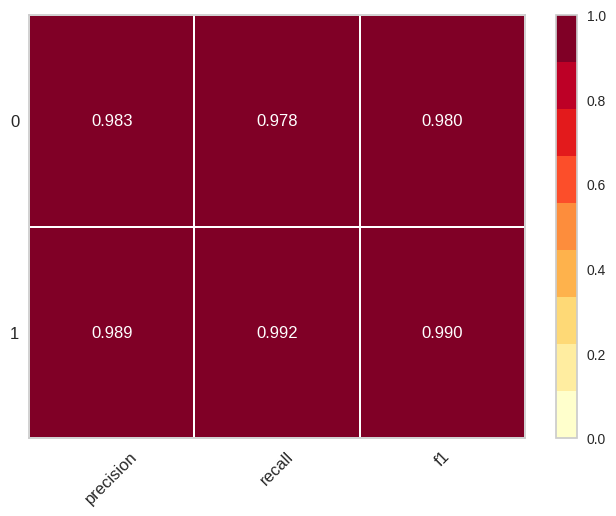

In [ ]:
getClassificationReport(classifier)

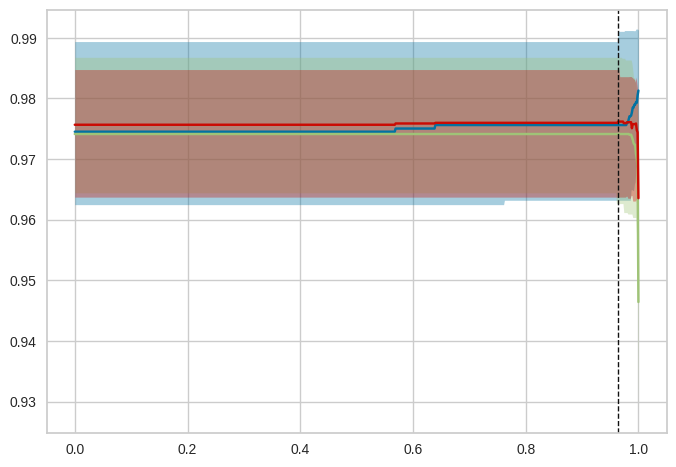

In [ ]:
getDiscriminationThreshold(classifier)

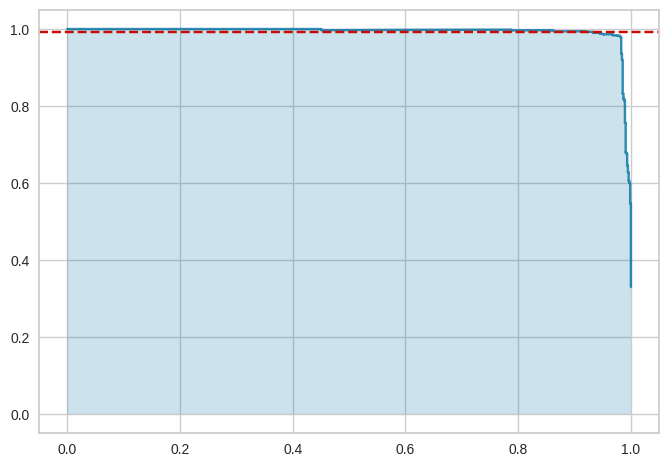

In [ ]:
getPrecisionRecall(classifier)

CHECKING CROSS VALIDATION SCORE

Average F1 score over 10-Folds: 0.9764910334771738
Average F1 score over Stratified 10-Folds: 0.976632088780885


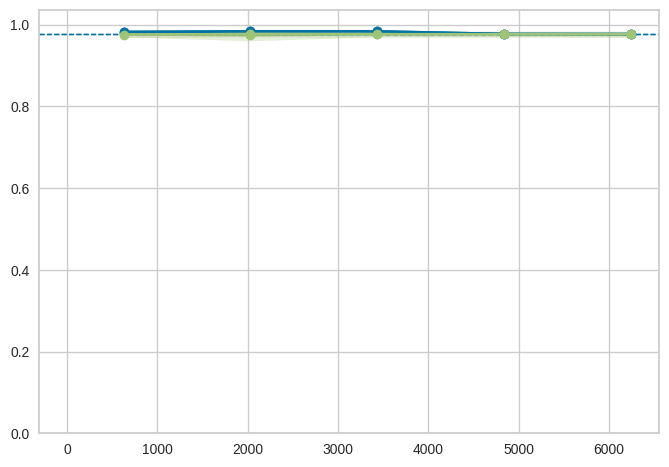

In [ ]:
crossValidationCheck(classifier, X, y, K=10)

HYPERPARAMETER TUNING FOR SVM

In [ ]:
parameters = {
    "C":np.arange(1, 3.05, 0.05),
    "gamma":["scale", "auto"],
    "shrinking":[True, False],
    "tol":[1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3],
    "class_weight":[None, "balanced"]
}

scores = ["f1", "balanced_accuracy"]

In [ ]:
# load this
classifier = GridSearchCV(
    SVC(kernel="rbf", random_state=0),
    param_grid=parameters,
    scoring=scores,
    refit="f1",
    verbose=1,
    n_jobs=-1
)

classifier.fit(X_train, y_train)

Fitting 5 folds for each of 2296 candidates, totalling 11480 fits


GridSearchCV(estimator=SVC(random_state=0), n_jobs=-1,
             param_grid={'C': array([1.  , 1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 ,
       1.55, 1.6 , 1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05,
       2.1 , 2.15, 2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 ,
       2.65, 2.7 , 2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  ]),
                         'class_weight': [None, 'balanced'],
                         'gamma': ['scale', 'auto'], 'shrinking': [True, False],
                         'tol': [0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0]},
             refit='f1', scoring=['f1', 'balanced_accuracy'], verbose=1)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, classification_report, cohen_kappa_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from yellowbrick.target import FeatureCorrelation
from yellowbrick.features import rank2d, RadViz, Rank2D
from yellowbrick.classifier import DiscriminationThreshold, PrecisionRecallCurve, ROCAUC
from yellowbrick.model_selection import feature_importances, CVScores, RFECV, FeatureImportances
from yellowbrick.model_selection import LearningCurve, ValidationCurve
from yellowbrick.classifier import ClassificationReport, ClassPredictionError, ConfusionMatrix

# Define the 'performance' function within this cell
def performance(test, pred):
    conf_matrix = confusion_matrix(test, pred)
    f1 = f1_score(test, pred)
    report = classification_report(test, pred)
    accuracy = balanced_accuracy_score(test, pred)
    kappa = cohen_kappa_score(test, pred)
    print(f"F1 Score: {f1}")
    print(f"Kappa Score: {kappa}")
    print(f"Accuracy Score: {accuracy}")
    print(f"Confusion")

In [ ]:
classifier = GridSearchCV(
    SVC(kernel="rbf", random_state=0),
    param_grid=parameters,
    scoring=scores,
    refit="f1",
    verbose=1,
    n_jobs=-1
)

# This line is crucial: it fits the model and finds the best parameters
classifier.fit(X_train, y_train)

# Now you can access best_params_
print(classifier.best_params_)

Fitting 5 folds for each of 2296 candidates, totalling 11480 fits
{'C': np.float64(1.8500000000000008), 'class_weight': None, 'gamma': 'scale', 'shrinking': True, 'tol': 1}


In [ ]:
classifier.best_params_

{'C': np.float64(1.8500000000000008),
 'class_weight': None,
 'gamma': 'scale',
 'shrinking': True,
 'tol': 1}

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, classification_report, cohen_kappa_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from yellowbrick.target import FeatureCorrelation
from yellowbrick.features import rank2d, RadViz, Rank2D
from yellowbrick.classifier import DiscriminationThreshold, PrecisionRecallCurve, ROCAUC
from yellowbrick.model_selection import feature_importances, CVScores, RFECV, FeatureImportances
from yellowbrick.model_selection import LearningCurve, ValidationCurve
from yellowbrick.classifier import ClassificationReport, ClassPredictionError, ConfusionMatrix

# Define the 'performance' function within this cell
def performance(test, pred):
    conf_matrix = confusion_matrix(test, pred)
    f1 = f1_score(test, pred)
    report = classification_report(test, pred)
    accuracy = balanced_accuracy_score(test, pred)
    kappa = cohen_kappa_score(test, pred)
    print(f"F1 Score: {f1}")
    print(f"Kappa Score: {kappa}")
    print(f"Accuracy Score: {accuracy}")
    print(f"Confusion")

In [ ]:
performance(y_test, classifier.best_estimator_.predict(X_test))

F1 Score: 0.980106100795756
Kappa Score: 0.9703405782335246
Accuracy Score: 0.9845193256210205
Confusion


Average F1 score over 10-Folds: 0.9766065702445517
Average F1 score over Stratified 10-Folds: 0.9772079122086691


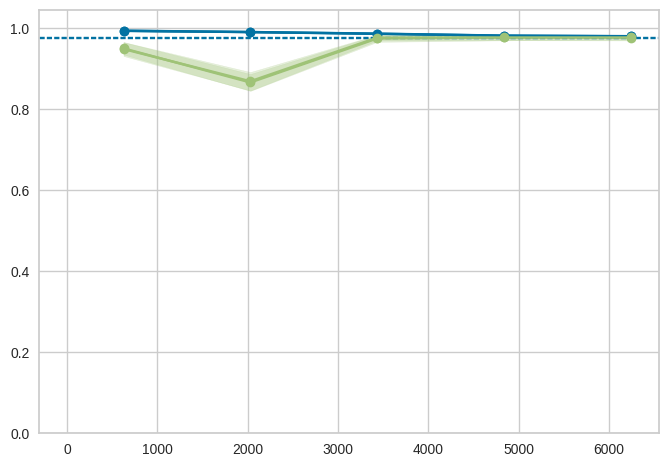

In [ ]:
crossValidationCheck(classifier.best_estimator_, X, y, K=10)

RANDOM FOREST

In [ ]:
classifier = RandomForestClassifier(random_state=0, n_jobs=-1)#, max_depth=8, n_estimators=400, min_samples_leaf=5)
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)

In [ ]:
performance(y_test, pred)

F1 Score: 0.9846153846153847
Kappa Score: 0.9771613862219027
Accuracy Score: 0.9857946510488883
Confusion


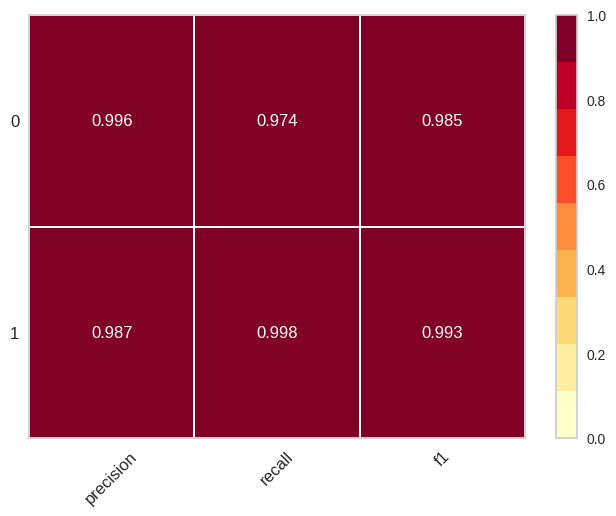

In [ ]:
getClassificationReport(classifier)

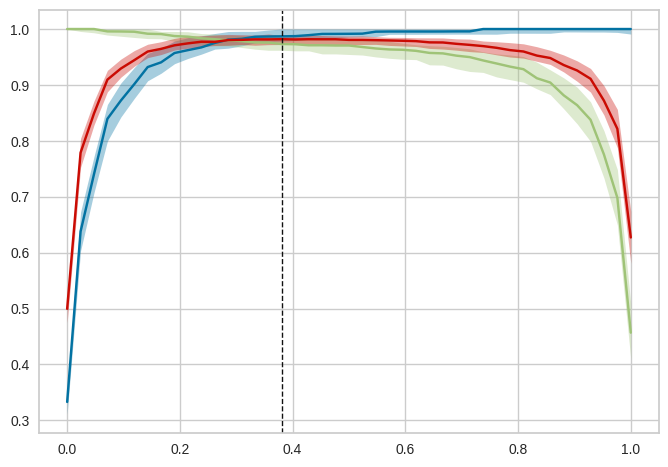

In [ ]:
getDiscriminationThreshold(classifier)

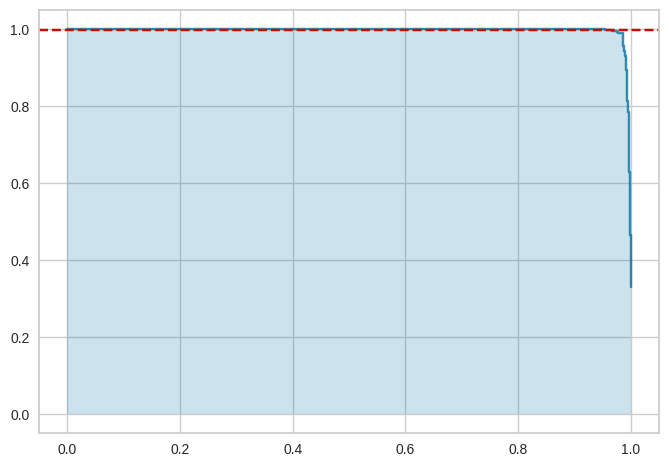

In [ ]:
getPrecisionRecall(classifier)

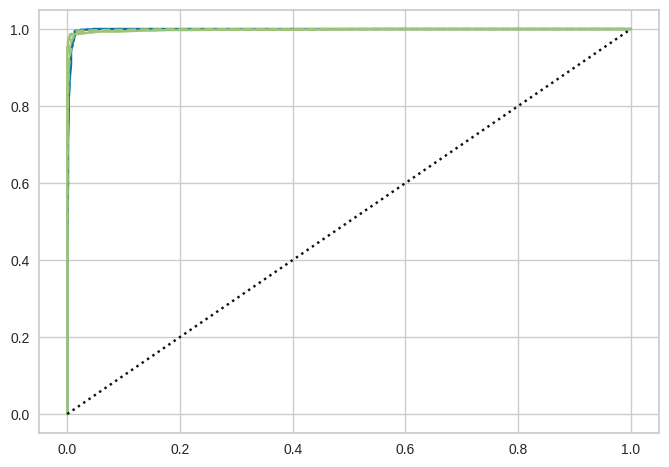

In [ ]:
rocCurve(classifier)

CHECKING CROSS VALIDATION SCORE

Average F1 score over 10-Folds: 0.9813129901559684
Average F1 score over Stratified 10-Folds: 0.9809718875492255


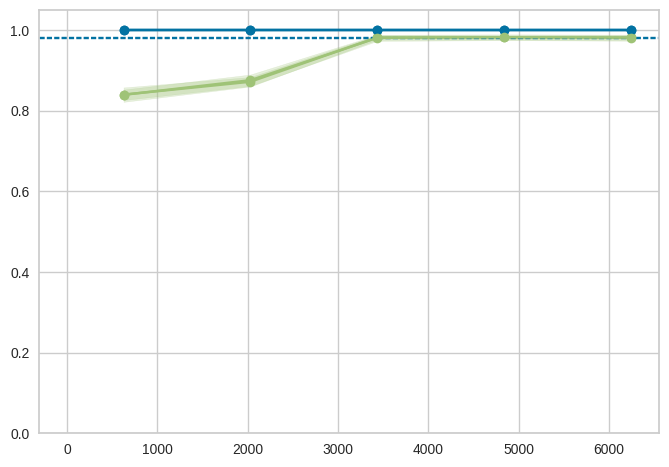

In [ ]:
crossValidationCheck(classifier, X, y, K=10)

FEATURE IMPORTANCE

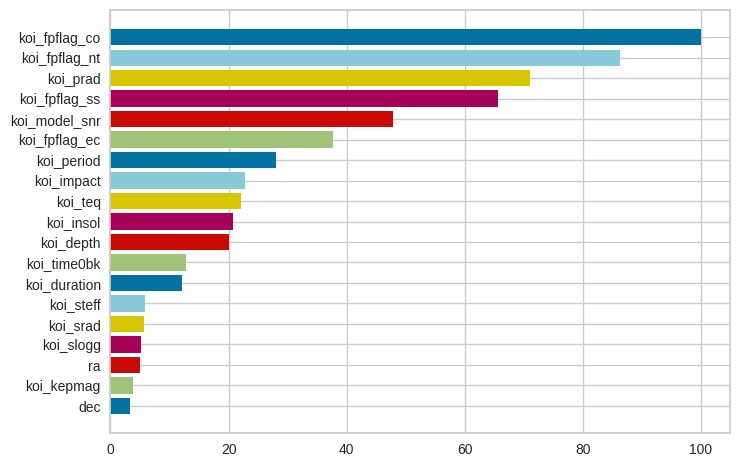

In [ ]:
getFeatureImportance(classifier, X, y)

Hyperparameter Tuning for Random Forest

ADABOOST

In [ ]:
classifier = AdaBoostClassifier(random_state=0)
classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=0)

In [ ]:
pred = classifier.predict(X_test)
performance(y_test, pred)

F1 Score: 0.9781021897810219
Kappa Score: 0.9673636741325267
Accuracy Score: 0.9828706290570697
Confusion


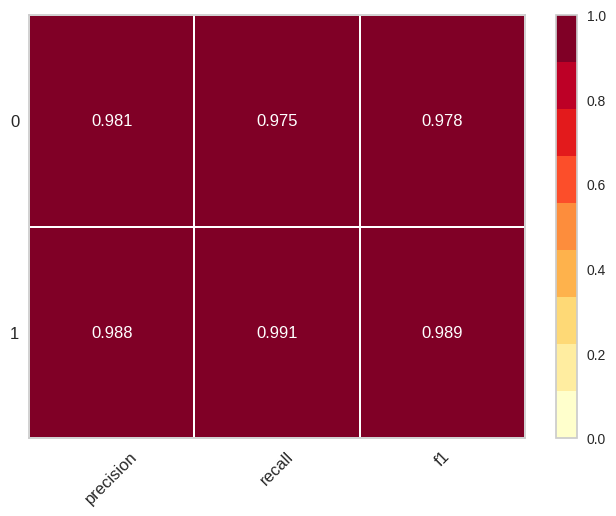

In [ ]:
getClassificationReport(classifier)

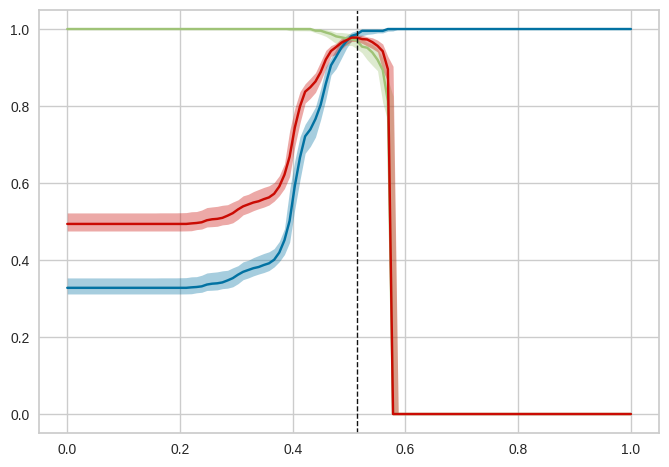

In [ ]:
getDiscriminationThreshold(classifier)

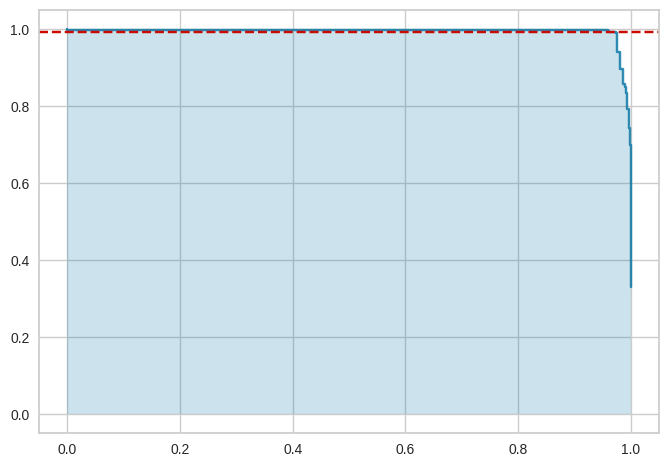

In [ ]:
getPrecisionRecall(classifier)

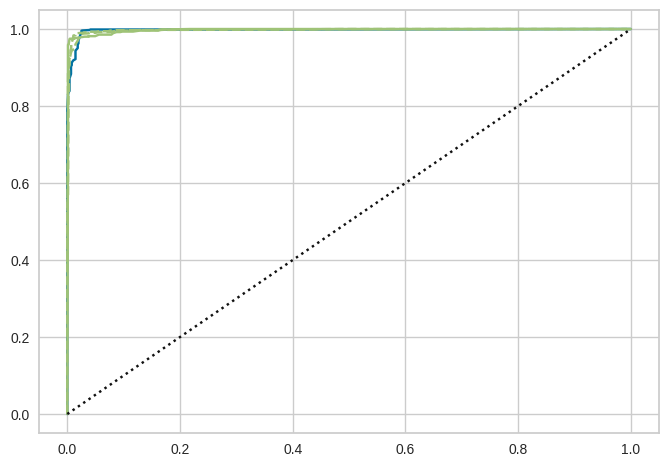

In [ ]:
rocCurve(classifier)

Checking Cross Validation Score

Average F1 score over 10-Folds: 0.9720490286049376
Average F1 score over Stratified 10-Folds: 0.9734346643672023


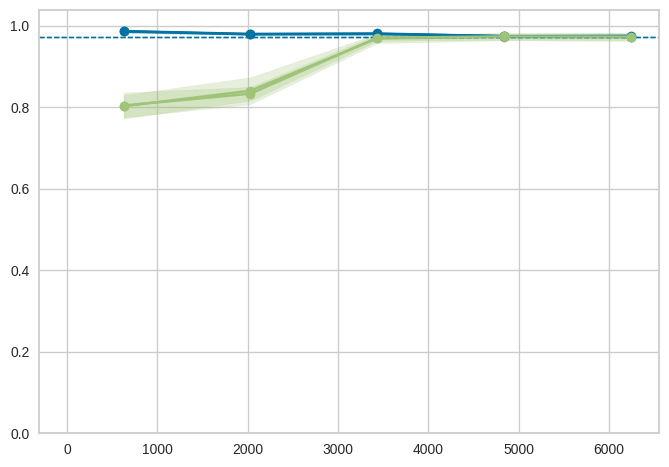

In [ ]:
crossValidationCheck(classifier, X, y, K=10)

Feature Elimination

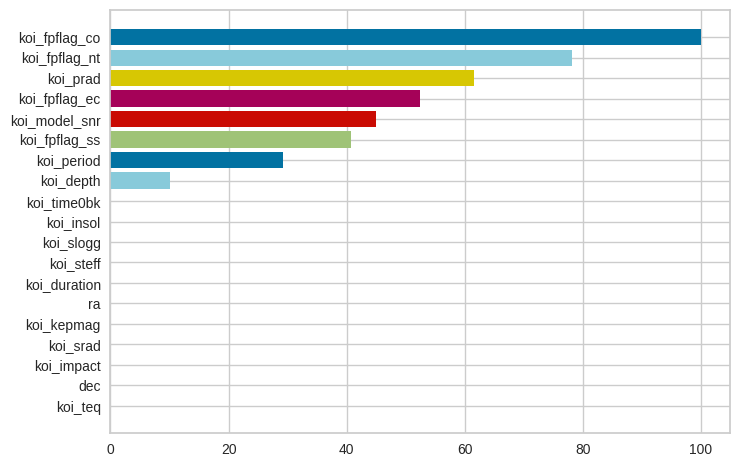

In [ ]:
getFeatureImportance(classifier, X, y)

Hyperparameter Tuning for AdaBoost

In [ ]:
parameters = {
    "n_estimators": np.arange(70, 130, 10),
    "learning_rate": np.arange(0.8, 1.2, 0.05),
    "algorithm": ["SAMME", "SAMME.R"],
    "estimator": [  # Change 'base_estimator' to 'estimator'
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
        DecisionTreeClassifier(max_depth=3),
        DecisionTreeClassifier(max_depth=None)
    ]
}

scores = ["f1", "balanced_accuracy"]

classifier = GridSearchCV(
    AdaBoostClassifier(random_state=0),
    param_grid=parameters,
    scoring=scores,
    refit="f1",
    verbose=1,
    n_jobs=-1
)

classifier.fit(X_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


GridSearchCV(estimator=AdaBoostClassifier(random_state=0), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'estimator': [DecisionTreeClassifier(max_depth=1),
                                       DecisionTreeClassifier(max_depth=2),
                                       DecisionTreeClassifier(max_depth=3),
                                       DecisionTreeClassifier()],
                         'learning_rate': array([0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 , 1.15]),
                         'n_estimators': array([ 70,  80,  90, 100, 110, 120])},
             refit='f1', scoring=['f1', 'balanced_accuracy'], verbose=1)